In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [2]:
df = pd.read_csv('../data/train.csv')
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21     17

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,...,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000
mean,94966.107886,-0.001070,-0.000904,-0.002722,-0.002603,0.000151,0.000779,-0.000811,-0.002327,-0.000622,...,0.000957,0.000056,0.000475,-0.000894,-0.000593,-0.000738,0.000404,0.000422,88.511723,0.001785
std,47464.723773,1.958944,1.650481,1.521820,1.416490,1.394123,1.338331,1.260122,1.208709,1.098393,...,0.743974,0.726681,0.620647,0.605148,0.521128,0.481720,0.404540,0.314973,256.737144,0.042210
min,0.000000,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-36.666000,-2.836627,-7.081325,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54348.000000,-0.922071,-0.599127,-0.896376,-0.848978,-0.691840,-0.768986,-0.554440,-0.209596,-0.642036,...,-0.228068,-0.542831,-0.161063,-0.354552,-0.318057,-0.327631,-0.070719,-0.053019,5.637500,0.000000
50%,84923.500000,0.016603,0.065839,0.177007,-0.020895,-0.054185,-0.274228,0.040417,0.021461,-0.051777,...,-0.029547,0.006488,-0.010688,0.040433,0.016916,-0.051262,0.001520,0.011216,22.020000,0.000000
75%,139404.000000,1.316250,0.802518,1.028302,0.738812,0.612154,0.400359,0.569221,0.326026,0.595095,...,0.186681,0.528971,0.147814,0.437888,0.350188,0.240718,0.091713,0.078480,77.650000,0.000000
max,172792.000000,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,18.282168,10.392889,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,16.129609,25691.160000,1.000000


In [5]:
df.isna().sum().sum()

np.int64(0)

In [6]:
df['Class'].value_counts()

Class
0    170579
1       305
Name: count, dtype: int64

In [7]:
df[df['Class'] == 0]['Amount'].describe()

count    170579.000000
mean         88.443356
std         256.738807
min           0.000000
25%           5.680000
50%          22.040000
75%          77.500000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
df[df['Class'] == 1]['Amount'].describe()

count     305.000000
mean      126.747738
std       253.341868
min         0.000000
25%         1.000000
50%        12.310000
75%       111.700000
max      1504.930000
Name: Amount, dtype: float64

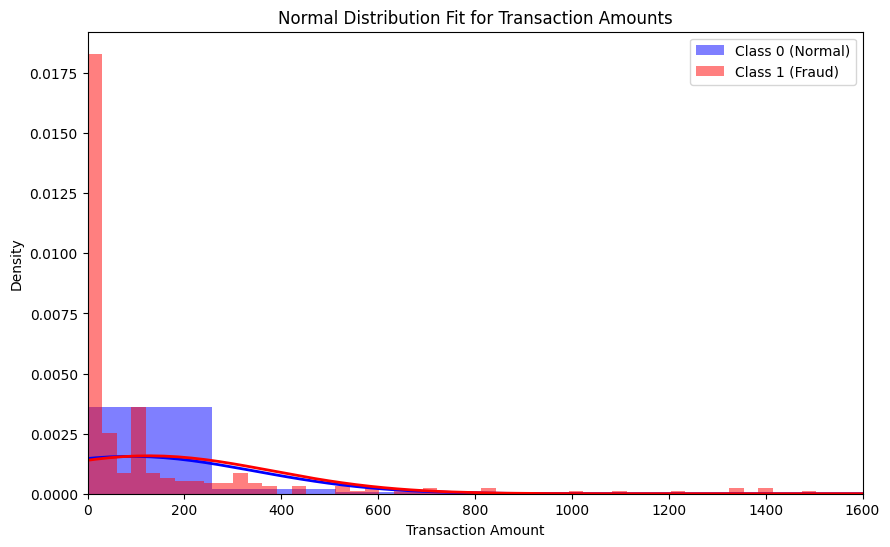

In [9]:
# Data
amount_class0 = df[df['Class'] == 0]['Amount']
amount_class1 = df[df['Class'] == 1]['Amount']

# Create histograms
plt.figure(figsize=(10,6))

# Histogram for Class 0
plt.hist(amount_class0, bins=100, density=True, alpha=0.5, color='blue', label='Class 0 (Normal)')

# Fit normal distribution and plot curve for Class 0
mu0, std0 = norm.fit(amount_class0)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p0 = norm.pdf(x, mu0, std0)
plt.plot(x, p0, 'b-', linewidth=2)

# Histogram for Class 1
plt.hist(amount_class1, bins=50, density=True, alpha=0.5, color='red', label='Class 1 (Fraud)')

# Fit normal distribution and plot curve for Class 1
mu1, std1 = norm.fit(amount_class1)
p1 = norm.pdf(x, mu1, std1)
plt.plot(x, p1, 'r-', linewidth=2)

# Labels and legend
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.title("Normal Distribution Fit for Transaction Amounts")
plt.legend()
plt.xlim(0, 1600)  # limit for visibility (optional)
plt.show()

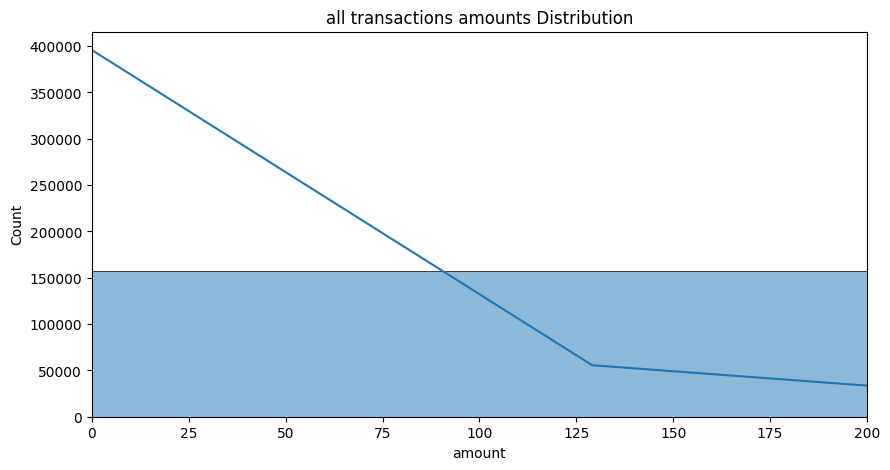

Skewness of transactions amounts: 19.99
transaction amount < 5.6375 : 42721
transactions amount > 77.65 : 42717


In [10]:
# Plot distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.xlim(0, 200)
plt.title("all transactions amounts Distribution")
plt.xlabel("amount")
plt.ylabel("Count")
plt.show()

# Calculate skewness
skewness = df['Amount'].skew()
print(f"Skewness of transactions amounts: {skewness:.2f}")

# Detect very little or very large amounts
print("transaction amount < 5.6375 :", (df['Amount']< 5.6375).sum())
print("transactions amount > 77.65 :", (df['Amount']> 77.65).sum())

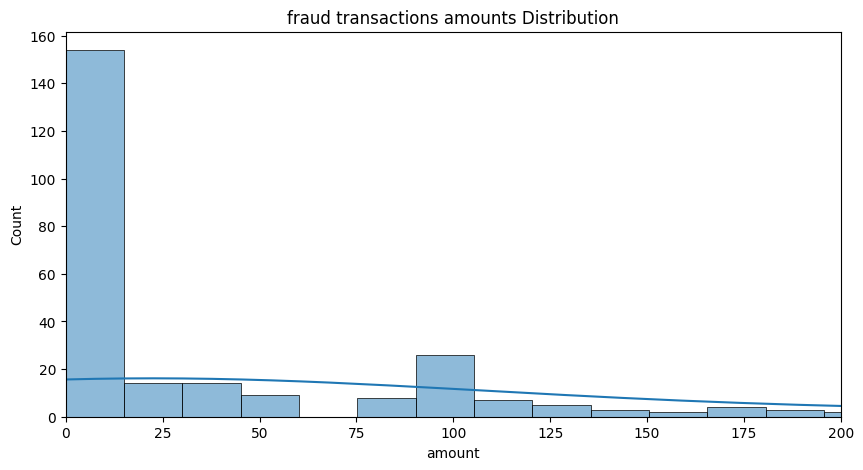

Skewness of fraud transactions amounts: 3.21
fraud transaction amount < 1 : 38
fraud transactions amount > 111.7 : 76


In [11]:

# Plot distribution
plt.figure(figsize=(10,5))
sns.histplot(amount_class1, bins=100, kde=True)
plt.xlim(0, 200)
plt.title("fraud transactions amounts Distribution")
plt.xlabel("amount")
plt.ylabel("Count")
plt.show()

# Calculate skewness
skewness = amount_class1.skew()
print(f"Skewness of fraud transactions amounts: {skewness:.2f}")

# Detect very little or very large amounts
print("fraud transaction amount < 1 :", (amount_class1< 1).sum())
print("fraud transactions amount > 111.7 :", (amount_class1> 111.7).sum())

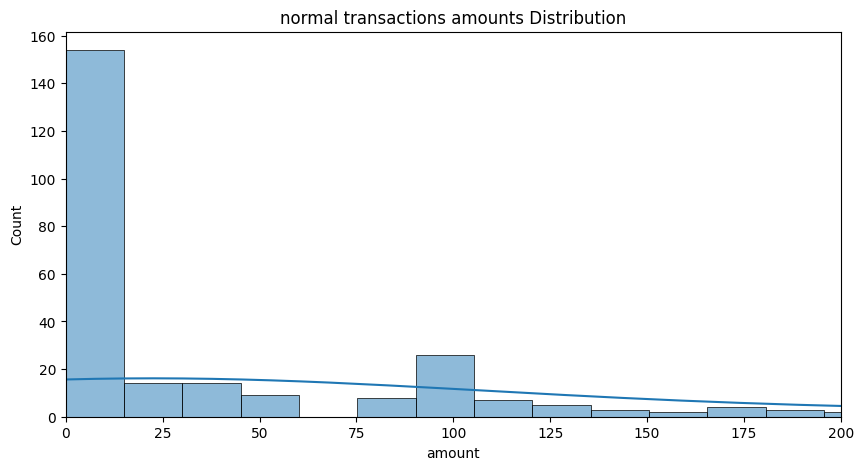

Skewness of normal transactions amounts: 20.02
normal transaction amount < 5.68 : 42633
normal transactions amount > 77.5 : 42643


In [12]:

# Plot distribution
plt.figure(figsize=(10,5))
sns.histplot(amount_class1, bins=100, kde=True)
plt.xlim(0, 200)
plt.title("normal transactions amounts Distribution")
plt.xlabel("amount")
plt.ylabel("Count")
plt.show()

# Calculate skewness
skewness = amount_class0.skew()
print(f"Skewness of normal transactions amounts: {skewness:.2f}")

# Detect very little or very large amounts
print("normal transaction amount < 5.68 :", (amount_class0< 5.68).sum())
print("normal transactions amount > 77.5 :", (amount_class0> 77.5).sum())

In [13]:
df['Hour'] = (df['Time'] // 3600) % 24

In [14]:
print(df[df['Class'] == 0]['Hour'].describe())
print(df[df['Class'] == 1]['Hour'].describe())

count    170579.000000
mean         14.057000
std           5.819666
min           0.000000
25%          10.000000
50%          15.000000
75%          19.000000
max          23.000000
Name: Hour, dtype: float64
count    305.000000
mean      11.662295
std        6.782867
min        0.000000
25%        5.000000
50%       12.000000
75%       18.000000
max       23.000000
Name: Hour, dtype: float64


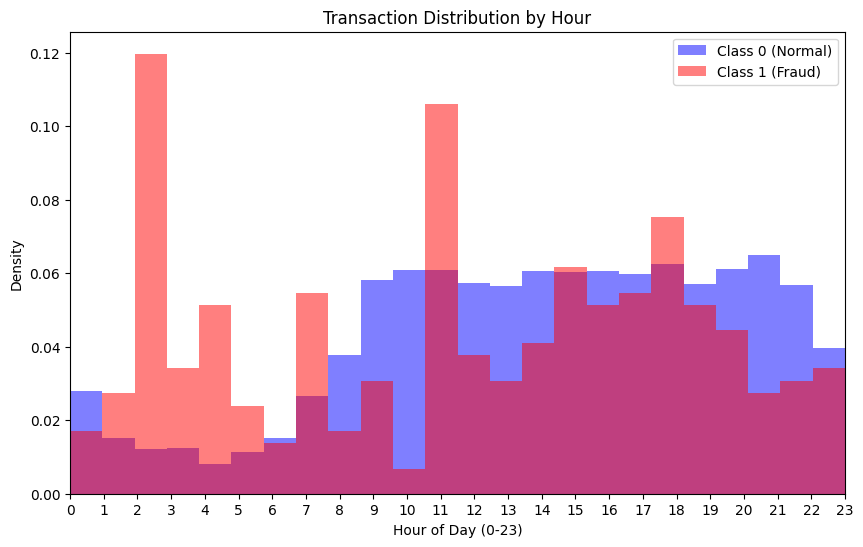

In [15]:
amount_class0 = df[df['Class'] == 0]['Hour']
amount_class1 = df[df['Class'] == 1]['Hour']

plt.figure(figsize=(10,6))

# Histogram for Class 0 (Normal)
plt.hist(amount_class0, density=True, bins=24, alpha=0.5, color='blue', label='Class 0 (Normal)', align='mid')

# Histogram for Class 1 (Fraud)
plt.hist(amount_class1, density=True, bins=24, alpha=0.5, color='red', label='Class 1 (Fraud)', align='mid')

# Labels and legend
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Density")
plt.title("Transaction Distribution by Hour")
plt.legend()
plt.xticks(range(24))   # explicitly show 0 → 23 on x-axis
plt.xlim(0, 23)         # limit x-axis
plt.show()

* Fraud transactions (Class 1) peak around hours 0-2 and 10-11, with the highest density reaching approximately 0.12 at hour 1.

* Normal transactions (Class 0) are more evenly distributed, with noticeable peaks around hours 9-10 and 18-20.

* Fraud density remains relatively high throughout the day, especially from hours 6 to 23, while normal transaction density fluctuates more significantly.

This suggests that fraudulent activities are more concentrated during early morning and late evening hours, while normal transactions are more spread out with notable activity during typical business and evening hours.

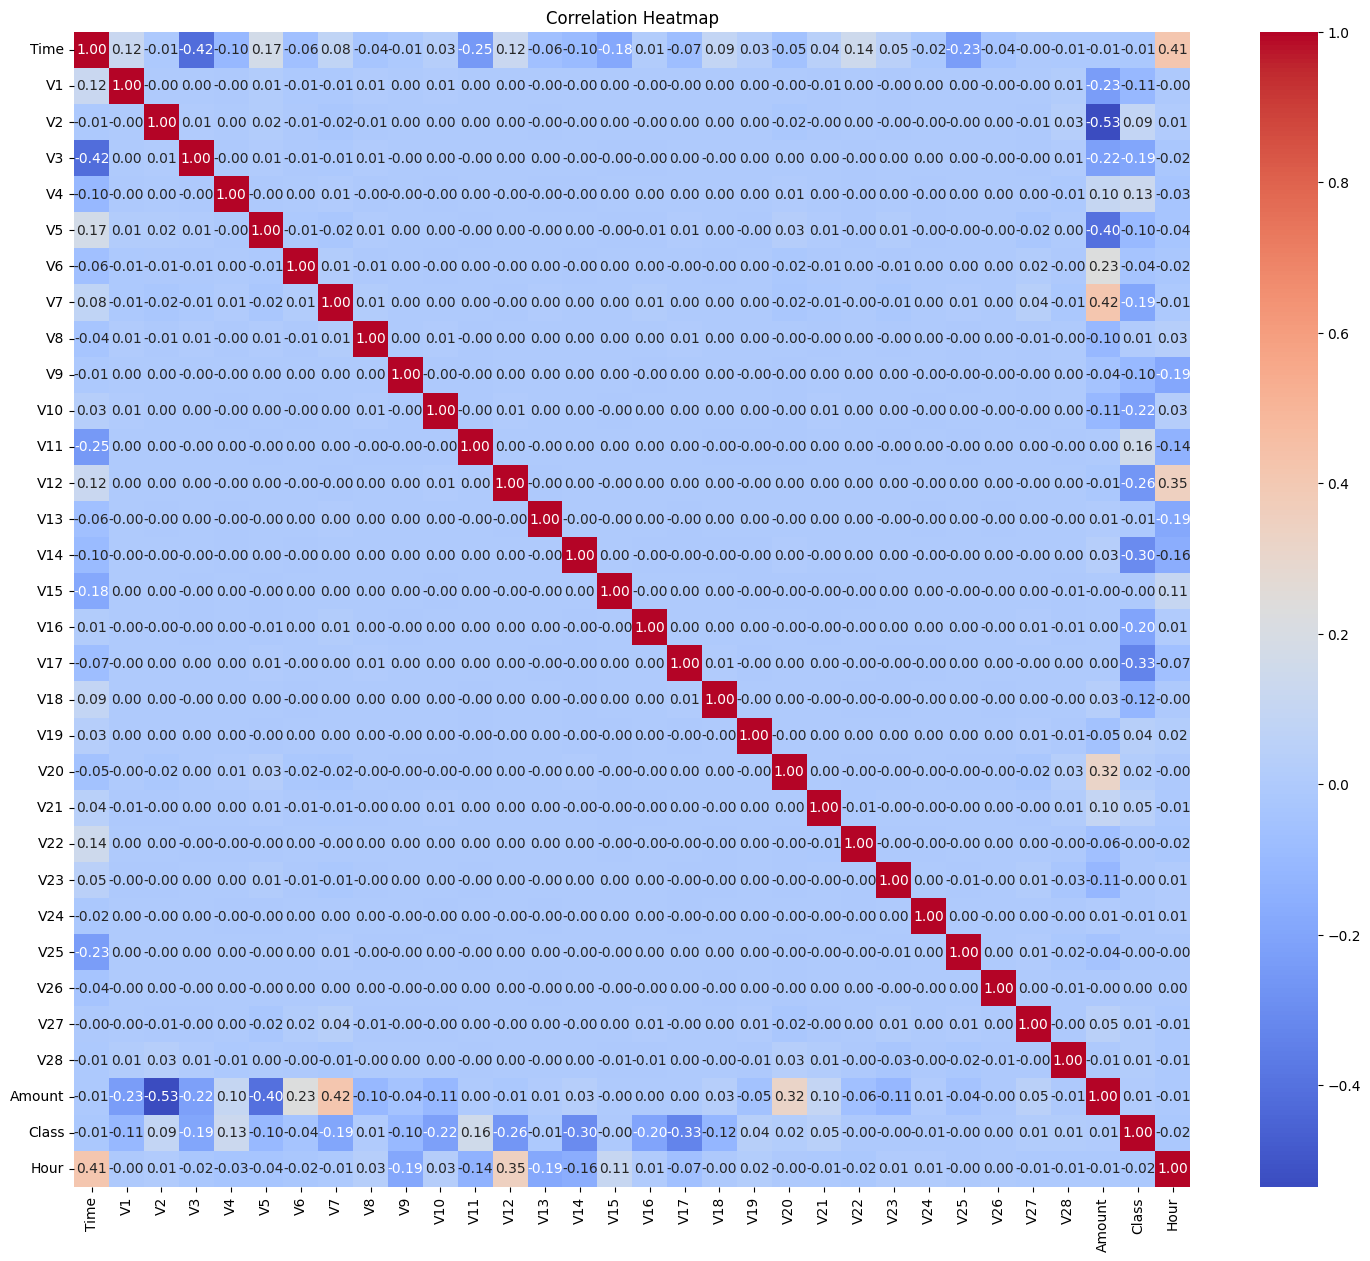

In [16]:
corr = df.corr()
# Heatmap of correlation matrix
plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Key Observations for Correlations with Class (Fraud Indicator):

#### Positive correlations (features more associated with fraud):

* V11 (0.22): Strongest positive, shown in reddish hue.
* V12 (0.16), V4 (0.13), V1 (0.11), V9 (0.10), V2 (0.09): Moderate positives in pinkish tones.
* Weaker positives include V22 (0.05), V6 (0.04), V20 (0.04), V21 (0.02), V8 (0.01).


#### Negative correlations (features inversely associated with fraud):

* V18 (-0.33): Strongest negative, deep blue.
* V15 (-0.30), V13 (-0.26), V17 (-0.20), V3 (-0.19), V7 (-0.19): Notable negatives in blue shades.
* Weaker negatives include V19 (-0.12), V5 (-0.10), V26 (-0.01), Time (-0.01), V23 (-0.00), V24 (-0.00), V25 (-0.00).


#### Near-zero correlations: 
* Most features like V10 (0.00), V14 (-0.01), V16 (-0.00), V27 (0.00), V28 (0.01), Amount (0.01), and Hour (-0.02) show minimal relationship with Class, appearing in neutral light colors.
* This suggests certain features (e.g., V11, V18) could be key predictors for fraud detection models, while Time, Amount, and Hour have negligible direct influence on fraud likelihood.


### Key Observations for Correlations with Hour:

#### Positive correlations (features increasing with later hours):

* V12 (0.35): Strongest positive, red.
* V11 (0.14), V15 (0.11): Moderate positives in pink.
* Weaker positives include V24 (0.05), V22 (0.04), V8 (0.03), V10 (0.03), V19 (0.02), V7 (0.01), V16 (0.01), V2 (0.01).


#### Negative correlations (features decreasing with later hours):

* Time (-0.41): Strongest negative, deep blue—logical as Time represents cumulative transaction time.
* V20 (-0.33), V13 (-0.19), V14 (-0.16), V21 (-0.12), V9 (-0.09), V17 (-0.07), V5 (-0.04), V4 (-0.03), V3 (-0.02), V6 (-0.02).


#### Near-zero correlations: 
* Many like V1 (0.00), V18 (0.00), Amount (0.00), V23 (0.02), V25 (-0.00), V26 (-0.00), V27 (-0.01), V28 (0.00), Class (-0.02) are essentially uncorrelated, light-colored.

Hour shows moderate ties to specific features, potentially reflecting daily patterns in transaction characteristics, but little link to fraud Class or Amount.

Overall, this visualization highlights feature importance for modeling: fraud is more tied to certain anonymous V-features than to temporal or amount-based ones.

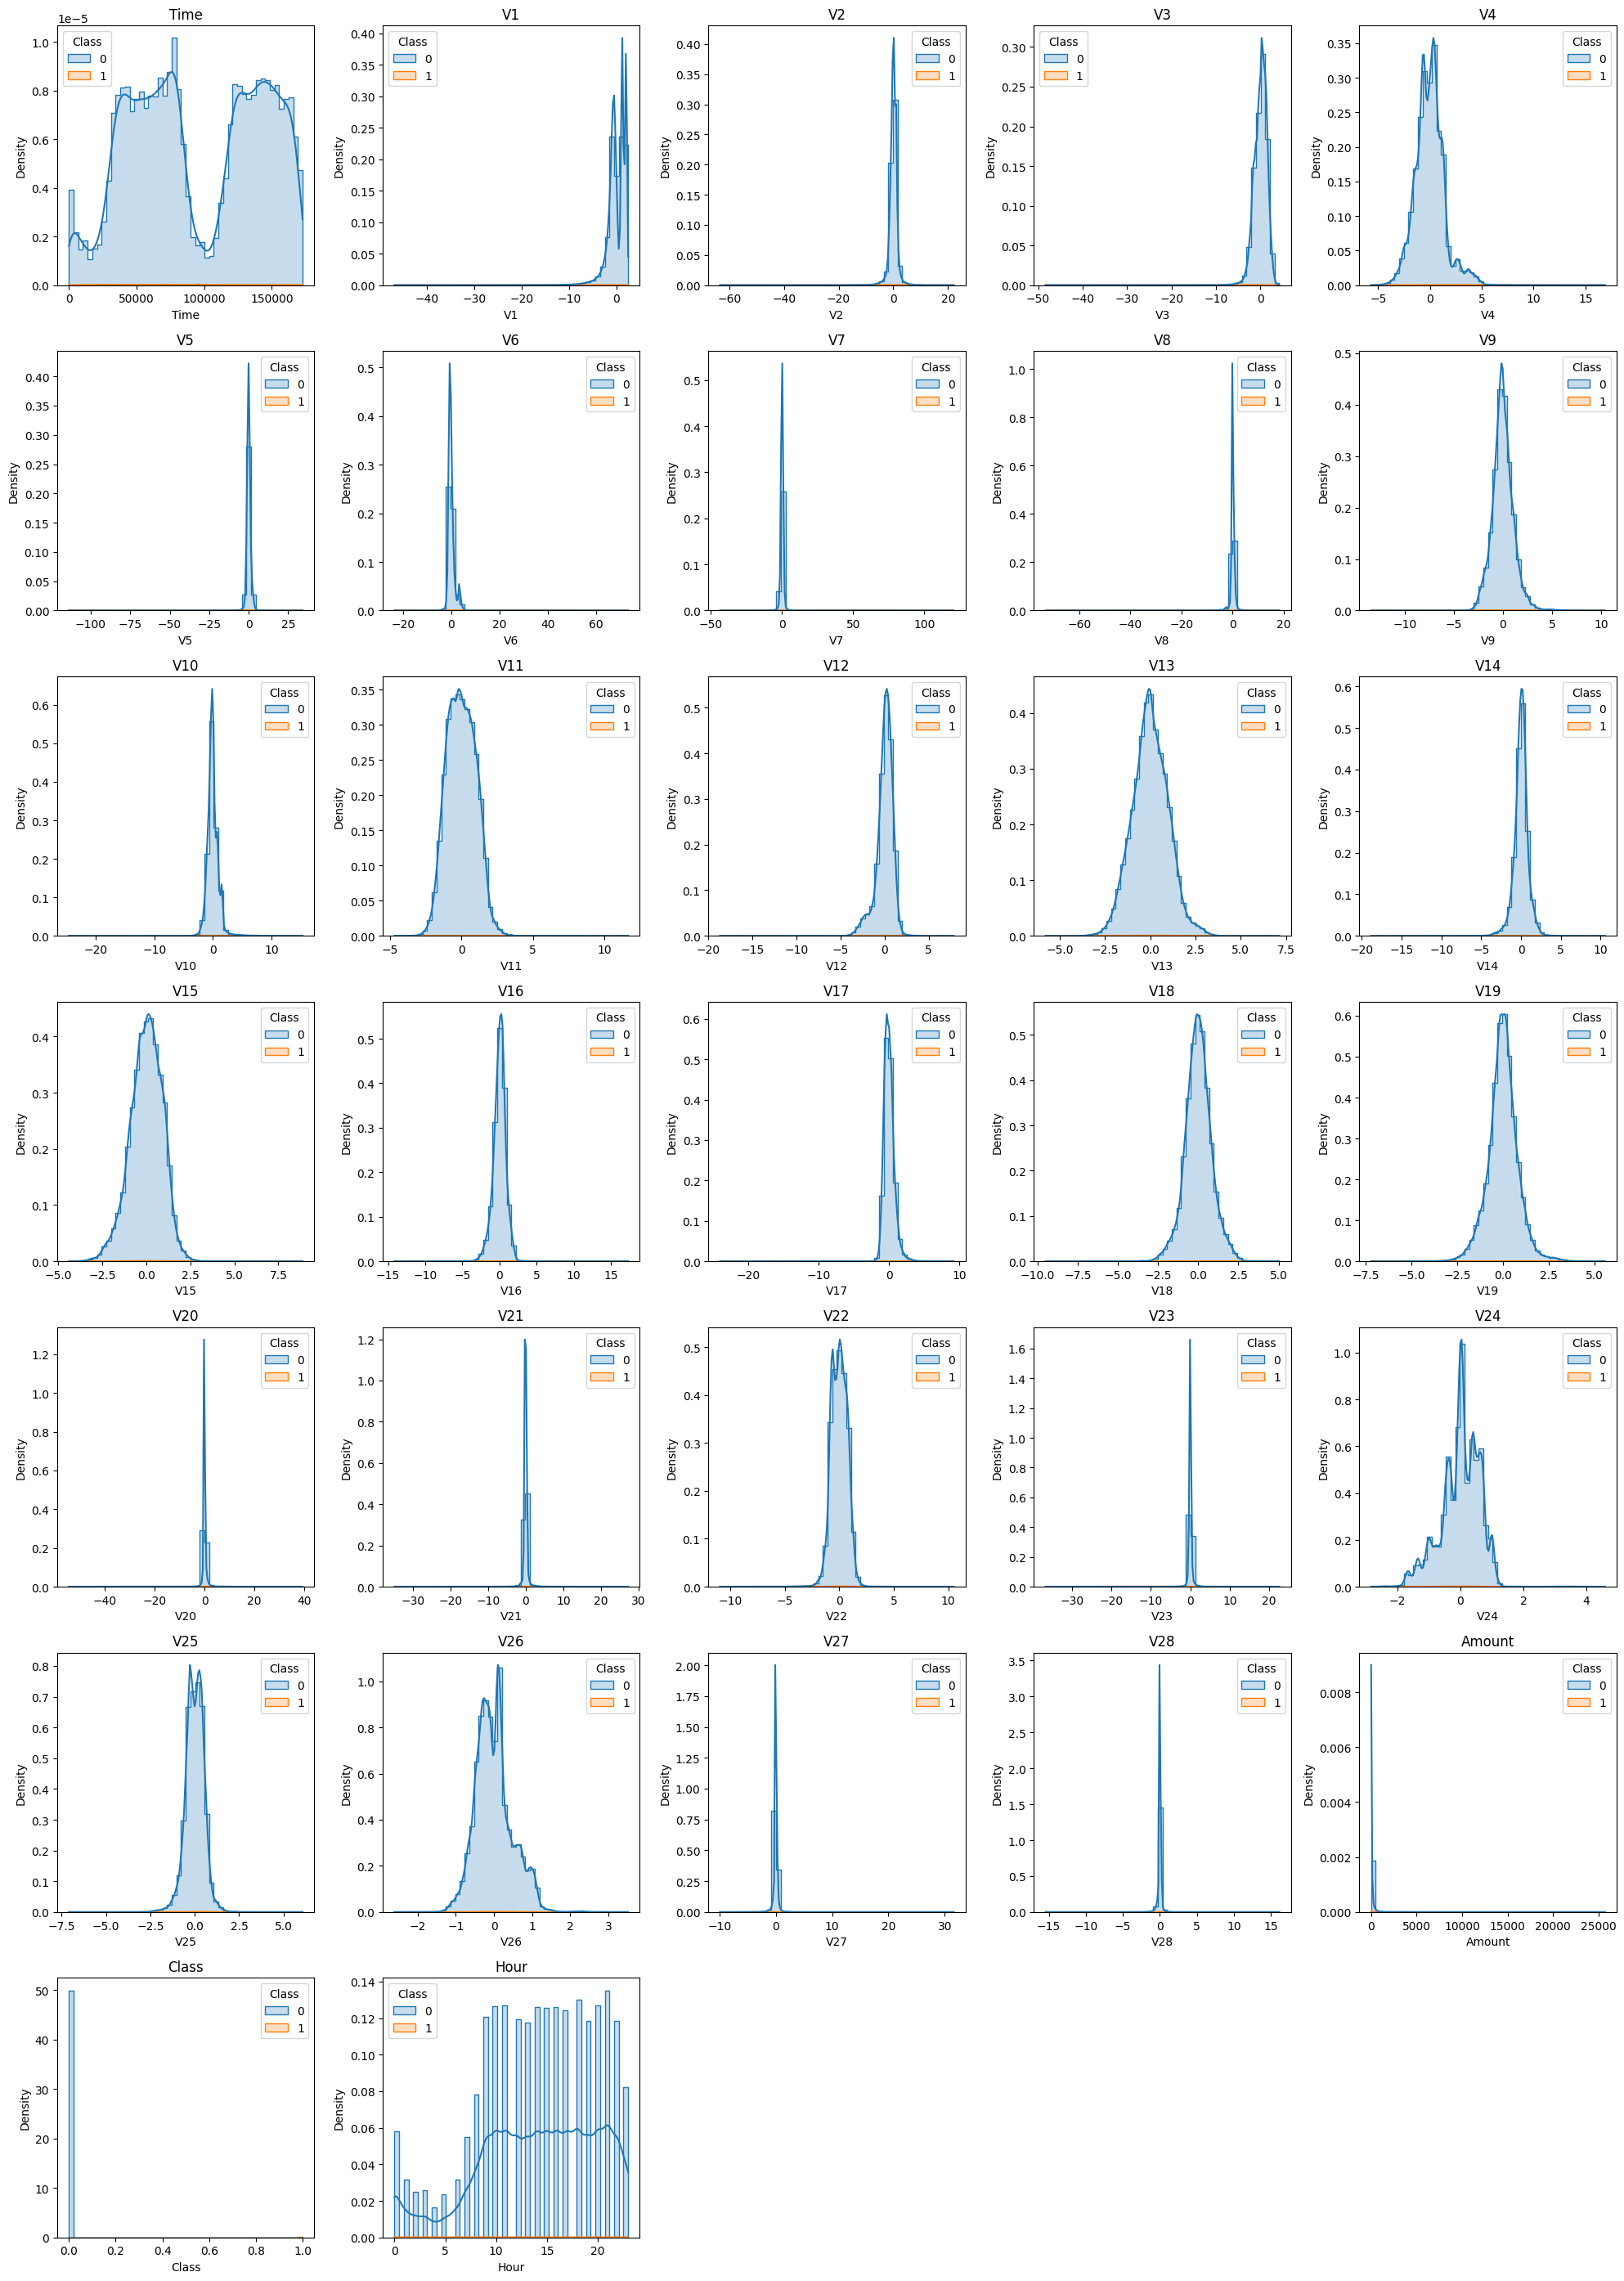

In [17]:
cols = df.columns
n_cols = 5 
n_rows = int(np.ceil(len(cols) / n_cols))

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=col, hue="Class",kde=True, bins=50, element="step", stat="density")
    plt.title(col)

plt.tight_layout()
plt.show()

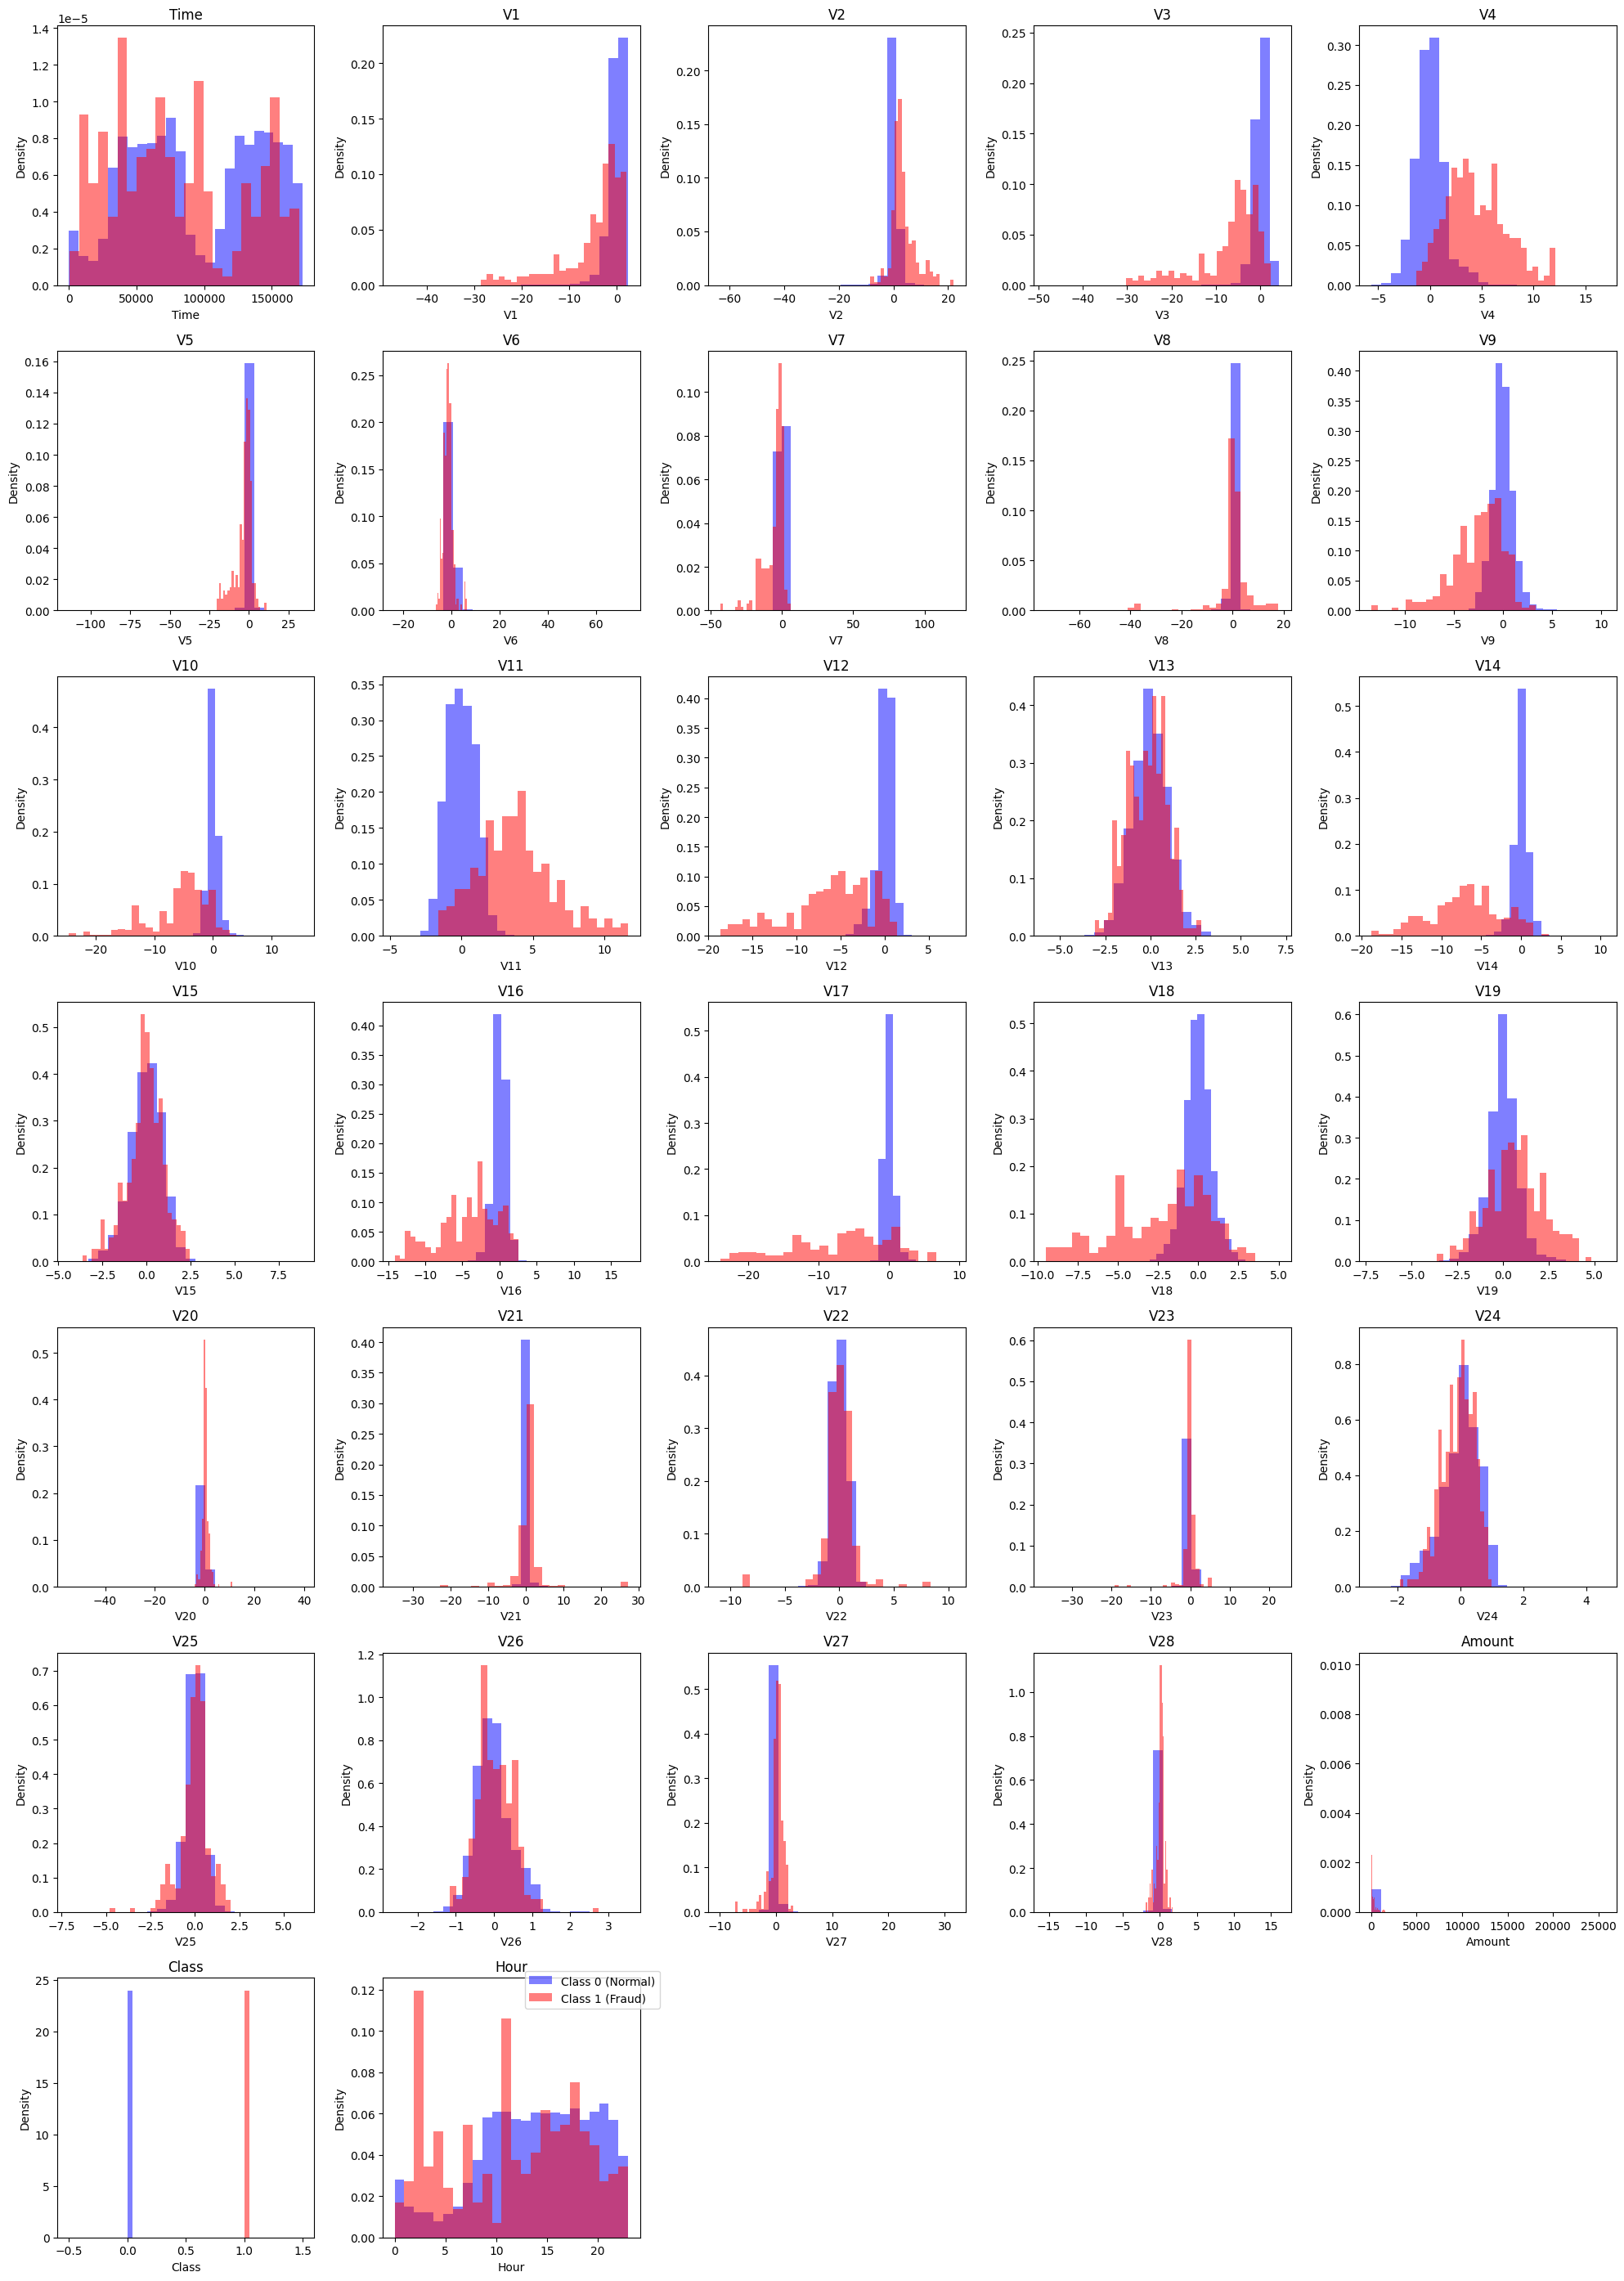

In [18]:
n_cols = 5
n_rows = int(np.ceil(len(cols) / n_cols))

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)

    class_1 = df[df['Class']==1][col]
    class_0 = df[df['Class']==0][col]

    # Histogram for Class 0 (Normal)
    plt.hist(class_0, density=True, bins=24, alpha=0.5, color='blue', label='Class 0 (Normal)')

    # Histogram for Class 1 (Fraud)
    plt.hist(class_1, density=True, bins=24, alpha=0.5, color='red', label='Class 1 (Fraud)')

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1.05))
plt.show()

/tmp/ipykernel_4945/916626533.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([class_0, class_1, all_data],
/tmp/ipykernel_4945/916626533.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([class_0, class_1, all_data],
/tmp/ipykernel_4945/916626533.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([class_0, class_1, all_data],
/tmp/ipykernel_4945/916626533.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([class_0, 

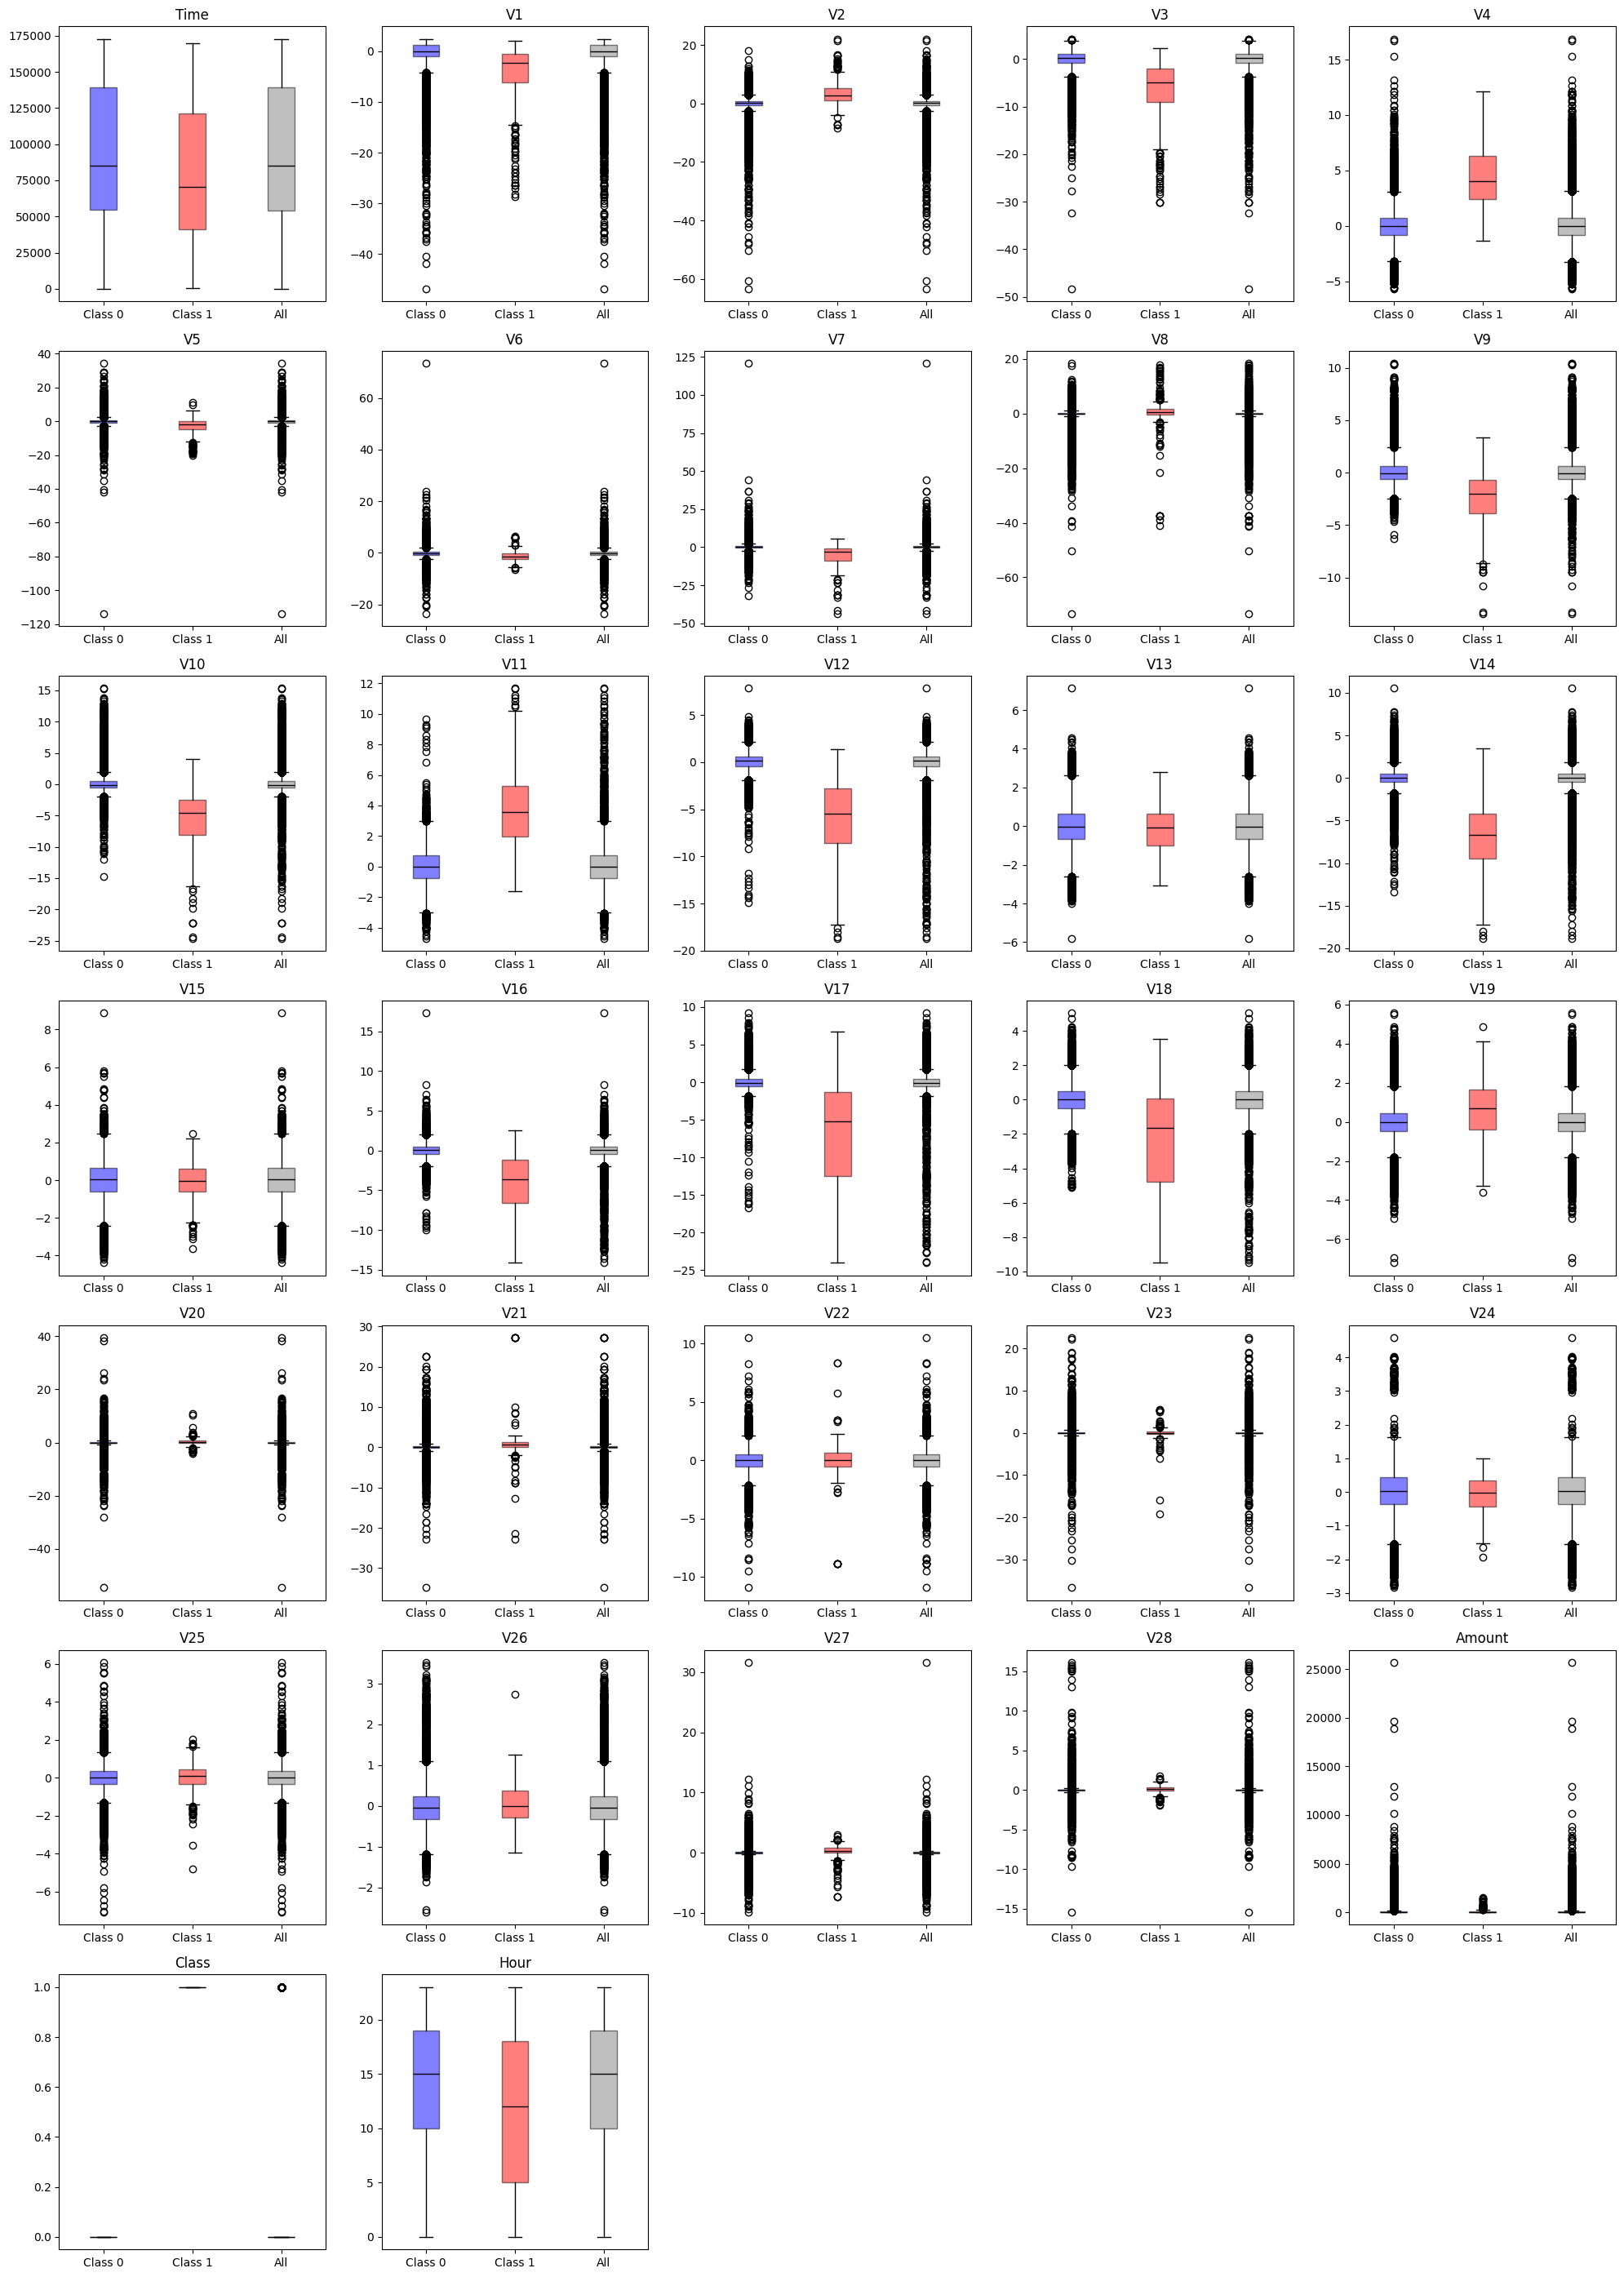

In [19]:
cols = df.columns
n_cols = 5
n_rows = int(np.ceil(len(cols) / n_cols))

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)

    class_1 = df[df['Class'] == 1][col]
    class_0 = df[df['Class'] == 0][col]
    all_data = df[col]

    # Boxplots: Class 0 (blue), Class 1 (red), All (gray)
    bp = plt.boxplot([class_0, class_1, all_data],
                     labels=['Class 0','Class 1','All'],
                     patch_artist=True,
                     medianprops=dict(color='black'),
                     whiskerprops=dict(color='black'),
                     capprops=dict(color='black'))

    # Apply colors manually
    colors = ['blue', 'red', 'gray']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.5)

    plt.title(col)

plt.tight_layout()
plt.show()

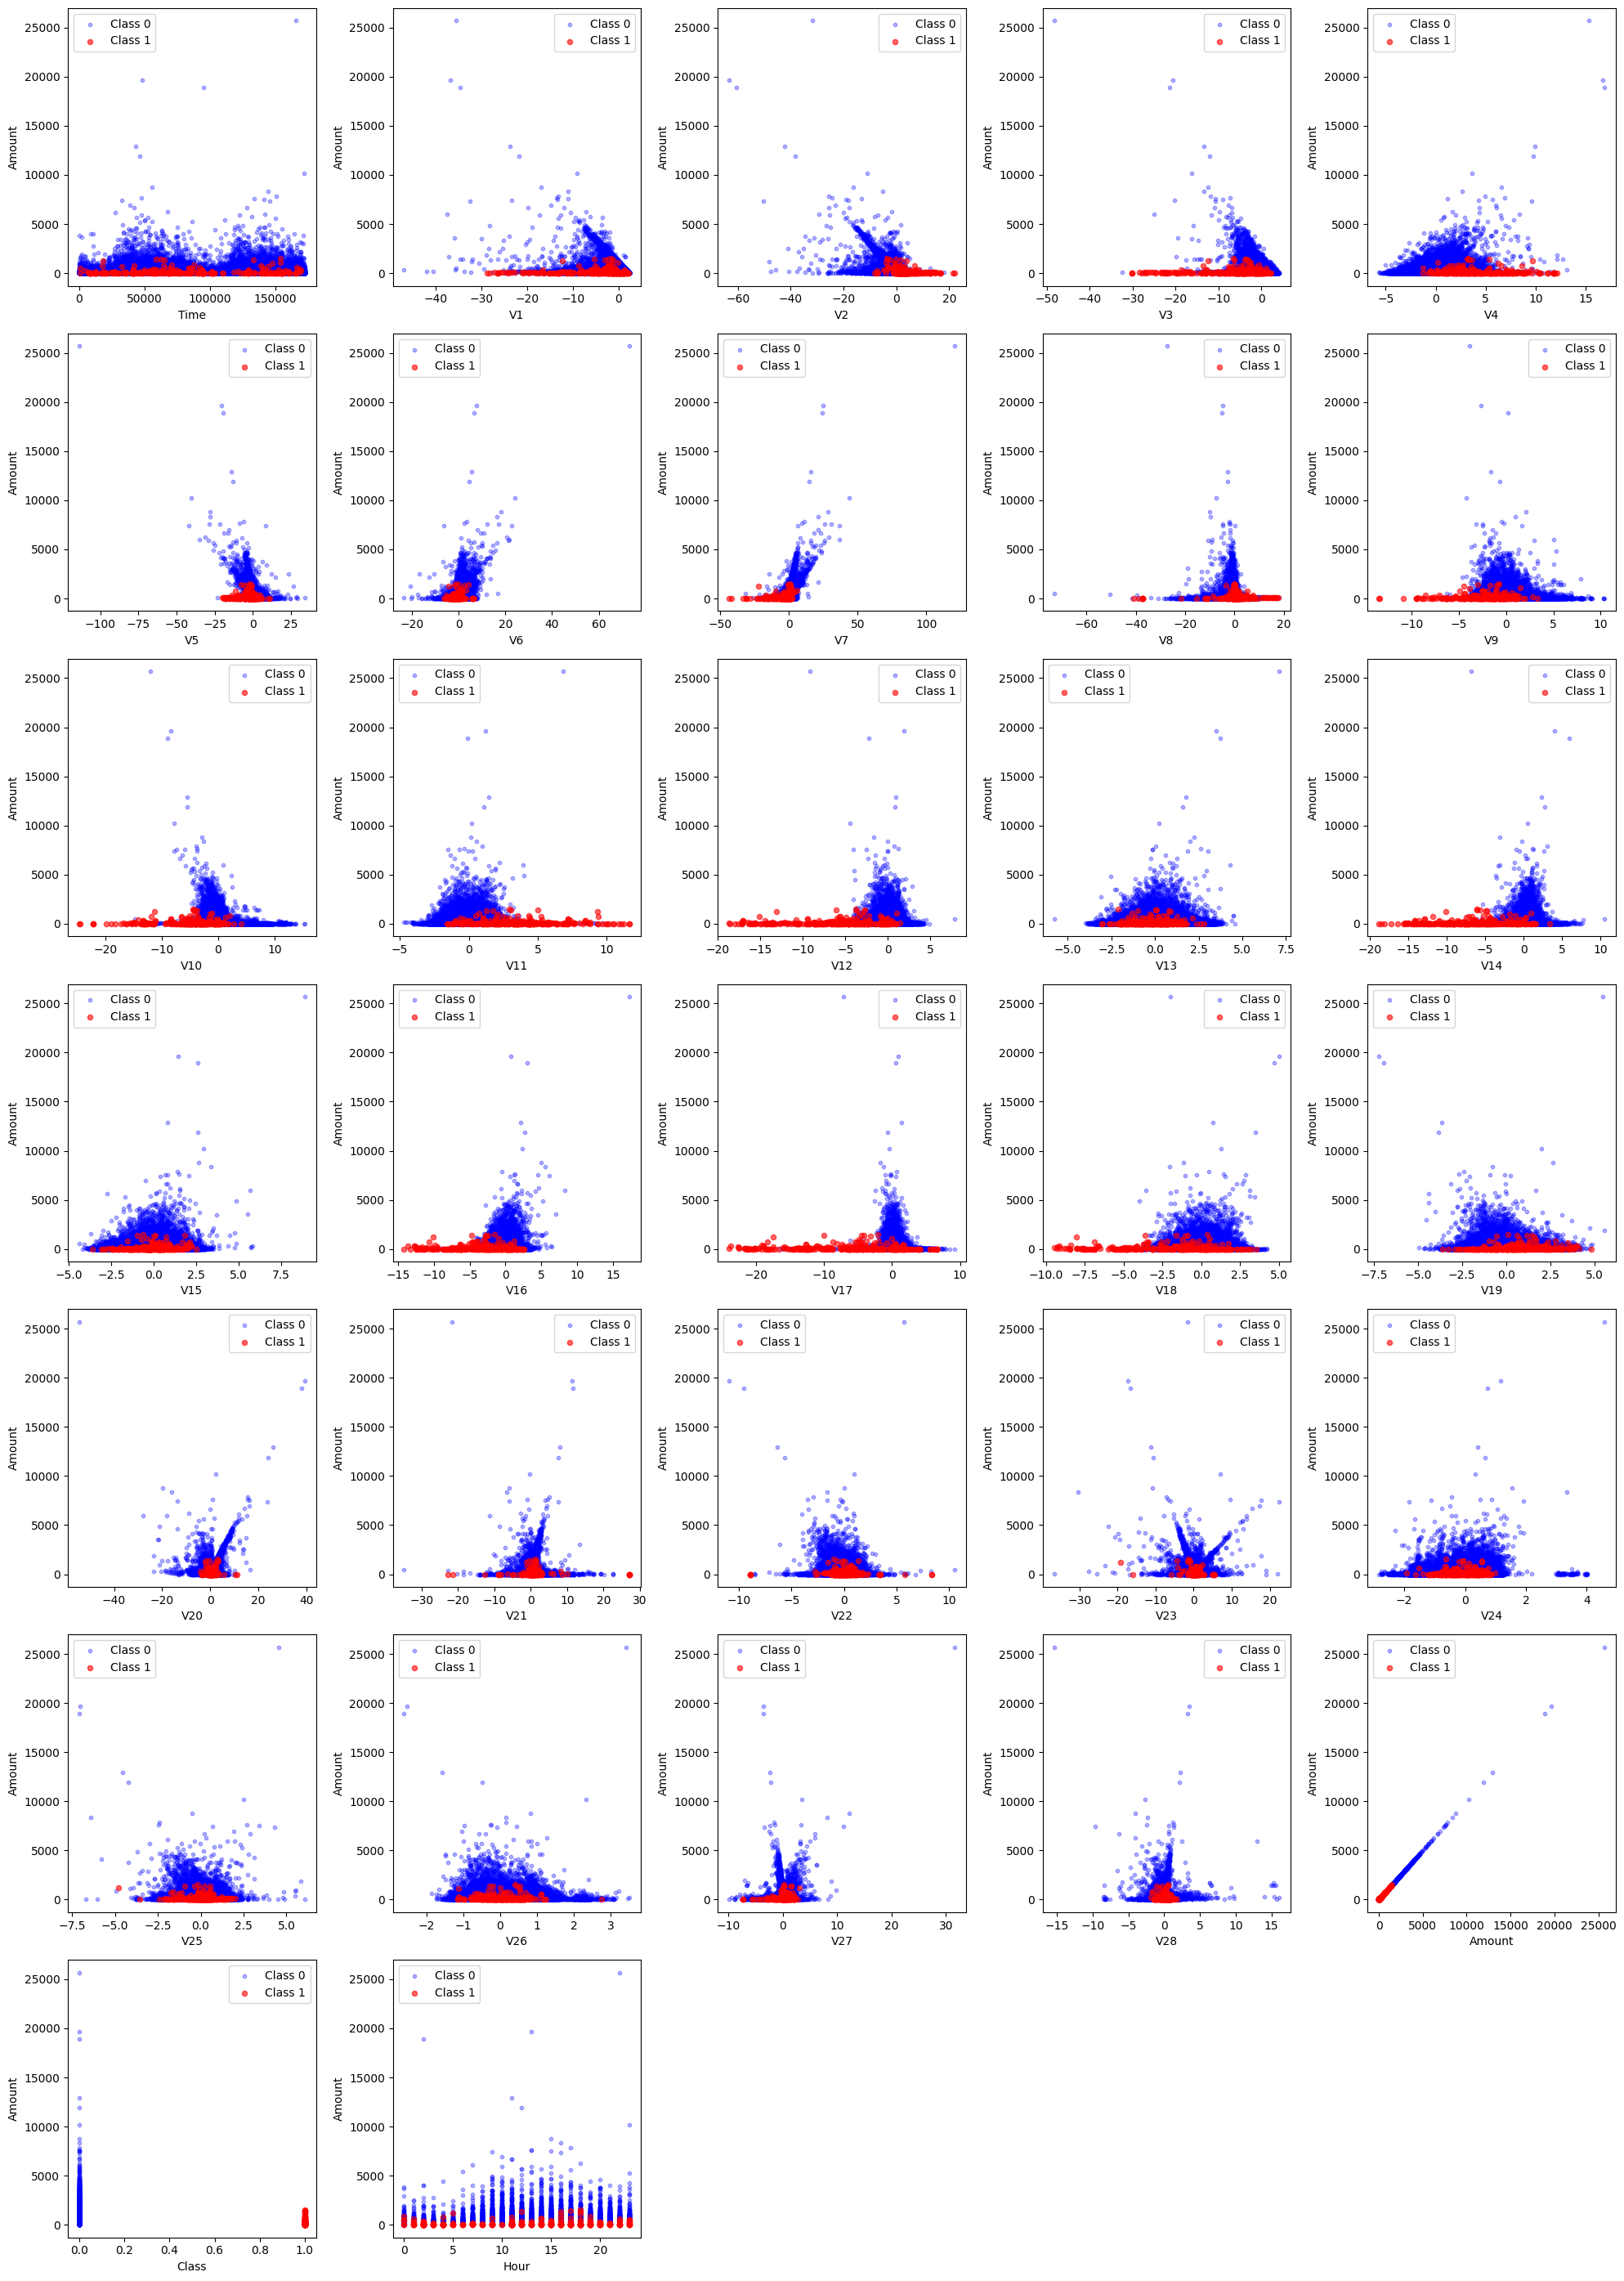

In [20]:
features = df.columns  
n_cols = 5
n_rows = int(np.ceil(len(features) / n_cols))

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(df[df['Class']==0][col], df[df['Class']==0]['Amount'], 
                alpha=0.3, s=10, label="Class 0", color="blue")
    plt.scatter(df[df['Class']==1][col], df[df['Class']==1]['Amount'], 
                alpha=0.6, s=20, label="Class 1", color="red")
    plt.xlabel(col)
    plt.ylabel("Amount")
    plt.legend()

plt.tight_layout()
plt.show()

## Key observations include:

### Time:

* Class 0 shows a wide spread of amounts across all time values, with a dense cluster near lower amounts. Class 1 is sparse but concentrated at lower amounts and specific time ranges, suggesting fraud occurs at particular cumulative times.


### V1 to V28 (PCA Features):

* Most plots (e.g., V1, V3, V5, V7, V9, V11, V13, V15, V17, V19, V21, V23, V25, V27) show Class 0 with a broad distribution of amounts, while Class 1 forms tight clusters, often at lower amounts (e.g., V11, V15), indicating distinct fraud patterns.
* Some features (e.g., V2, V4, V6, V8, V10, V12, V14, V16, V18, V20, V22, V24, V26, V28) have overlapping distributions, with Class 1 amounts rarely exceeding those of Class 0, except in rare cases (e.g., V28).


### Amount:

* The Amount vs. Amount plot (diagonal) confirms the scale, with Class 0 dominating higher amounts and Class 1 concentrated below 10,000, aligning with the histogram observation of smaller fraud transaction amounts.


### Hour:

* Class 0 amounts are widely distributed across hours, with a dense cluster at lower amounts. Class 1 shows a similar pattern but with fewer high-amount transactions, reinforcing the earlier finding of fraud peaking in early morning hours (0-2).



* These scatter plots suggest that fraud transactions (Class 1) are characterized by lower, more consistent amounts and are associated with specific ranges of PCA features (e.g., V11, V15), while normal transactions (Class 0) exhibit greater variability in amounts and feature values.

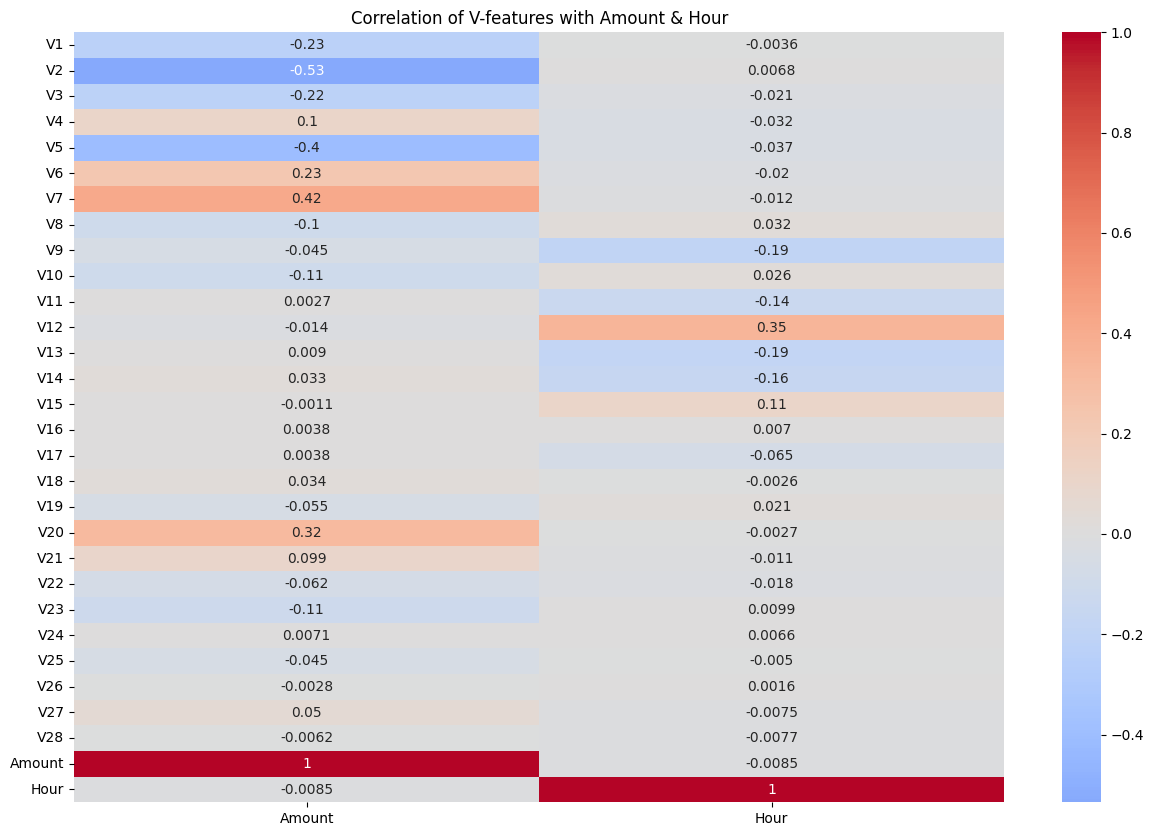

In [21]:
corr = df[[f"V{i}" for i in range(1,29)] + ['Amount','Hour']].corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr[['Amount','Hour']], annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of V-features with Amount & Hour")
plt.show()

## Correlations with Amount:

* Strongest positive correlations: V7 (0.42), V20 (0.32), V12 (0.35).
* Strongest negative correlations: V2 (-0.53), V5 (-0.4), V9 (-0.45).
* Near-zero correlations: V10 (-0.11), V13 (0.09), V16 (0.0038), V23 (-0.11), and others, indicating minimal linear relationship with Amount.
* Amount self-correlation: 1.0 (perfect positive correlation, as expected).

## Correlations with Hour:

* Strongest positive correlations: V12 (0.35), V11 (0.14).
* Strongest negative correlations: V9 (-0.19), V13 (-0.19), V14 (-0.16).
* Near-zero correlations: V1 (-0.0036), V3 (-0.021), V6 (-0.022), V16 (0.007), V24 (0.0066), and others, showing little association with Hour.
* Hour self-correlation: 1.0 (perfect positive correlation).

## Insights:

* Amount Relationships: Features like V7, V20, and V12 have moderate to strong positive correlations with Amount, suggesting these PCA components are influenced by transaction size. Conversely, V2, V5, and V9’s negative correlations indicate an inverse relationship, possibly reflecting smaller amounts in certain fraud patterns.
* Hour Relationships: V12 and V11 show the most notable ties to Hour, aligning with the earlier observation of fraud peaking at specific hours (e.g., 0-2). Negative correlations (e.g., V9, V13) might indicate features decreasing with later hours.
* Cross-Feature Context: The varying correlations (e.g., V7’s 0.42 with Amount vs. -0.012 with Hour) suggest that Amount and Hour capture different aspects of the data, with V-features mediating these relationships differently.

<Figure size 1000x600 with 0 Axes>

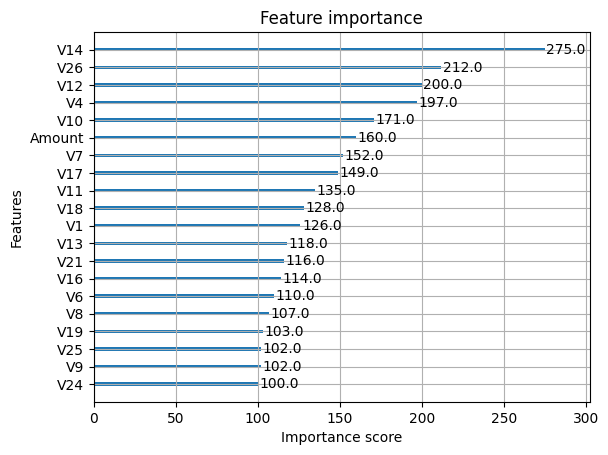

In [22]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split

# Features & Target
X = df.drop(['Time','Class'], axis=1)   # استخدام V1–V28 + Amount + Hour
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    scale_pos_weight=(len(y[y==0]) / len(y[y==1])), # للتعامل مع عدم التوازن
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)

# Plot importance
plt.figure(figsize=(10,6))
plot_importance(xgb, max_num_features=20, importance_type="weight")
plt.show()


In [23]:
def extract_rush_hour(hour):
    rush_hours = [0, 1, 2]
    return 1 if hour in rush_hours else 0

df['is_rush_hour'] = df['Hour'].apply(extract_rush_hour)

In [24]:
df['log_amount'] = np.log1p(df['Amount'])

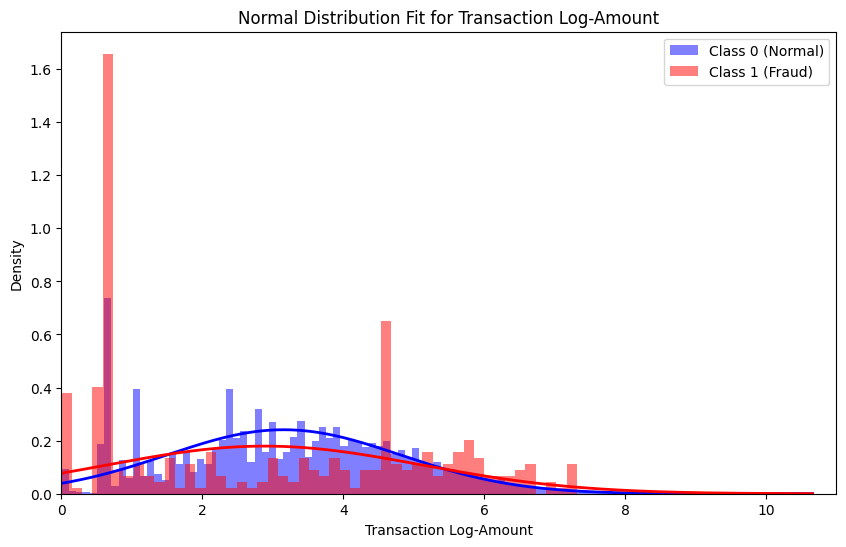

In [25]:
# Data
amount_class0 = df[df['Class'] == 0]['log_amount']
amount_class1 = df[df['Class'] == 1]['log_amount']

# Create histograms
plt.figure(figsize=(10,6))

# Histogram for Class 0
plt.hist(amount_class0, bins=100, density=True, alpha=0.5, color='blue', label='Class 0 (Normal)')

# Fit normal distribution and plot curve for Class 0
mu0, std0 = norm.fit(amount_class0)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p0 = norm.pdf(x, mu0, std0)
plt.plot(x, p0, 'b-', linewidth=2)

# Histogram for Class 1
plt.hist(amount_class1, bins=50, density=True, alpha=0.5, color='red', label='Class 1 (Fraud)')

# Fit normal distribution and plot curve for Class 1
mu1, std1 = norm.fit(amount_class1)
p1 = norm.pdf(x, mu1, std1)
plt.plot(x, p1, 'r-', linewidth=2)

# Labels and legend
plt.xlabel("Transaction Log-Amount")
plt.ylabel("Density")
plt.title("Normal Distribution Fit for Transaction Log-Amount")
plt.legend()
plt.xlim(0, 11)  # limit for visibility (optional)
plt.show()

## Distribution Shape:
* Class 0 (Normal): The log-transformed Amount shows a more symmetric distribution with a peak around 4-6, and the fitted normal curve aligns reasonably well, indicating the log transformation has reduced the original right skewness seen in the raw Amount histogram.
* Class 1 (Fraud): The distribution is narrower, with a sharp peak near 0-2 and a secondary peak around 6-8. The fitted normal curve fits less tightly, suggesting some deviation from normality, likely due to the concentrated lower values.
### Density Peaks:
* Class 1 has a higher density at the lower end (near 0-2, reaching ~1.6), reflecting the prevalence of small-amount fraud transactions.
* Class 0 has a broader spread with a notable density around 4-6 (~0.4), consistent with a wider range of normal transaction amounts.
### Range and Overlap:
* The log-Amount ranges from 0 to ~12, with significant overlap between classes between 2 and 8, but Class 1 is more concentrated below 4, while Class 0 extends further.
* The normal fit curves suggest Class 0 has a wider variance, while Class 1’s variance is tighter, aligning with the box plot observations.
### Implications:
* Effectiveness of Log Transformation: The log transformation (log(Amount + 1) likely used, given the shift from raw values) has successfully normalized the distribution for Class 0, making it more suitable for models assuming normality (e.g., logistic regression) or improving tree-based model performance (e.g., Random Forest, XGBoost). For Class 1, the transformation reduces skewness but doesn’t fully normalize the distribution, which is expected given the tight clustering.

In [26]:
df['log_amount'].describe()

count    170884.000000
mean          3.154586
std           1.655762
min           0.000000
25%           1.892735
50%           3.136363
75%           4.365008
max          10.153941
Name: log_amount, dtype: float64

/tmp/ipykernel_4945/2161573844.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([class_0, class_1, all_data],


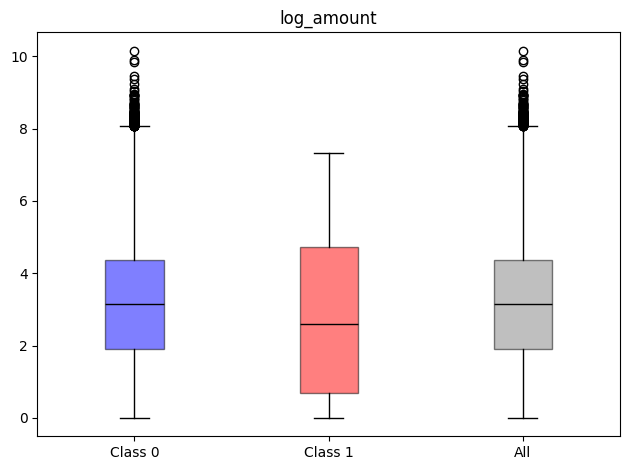

In [27]:
class_1 = df[df['Class'] == 1]['log_amount']
class_0 = df[df['Class'] == 0]['log_amount']
all_data = df['log_amount']

# Boxplots: Class 0 (blue), Class 1 (red), All (gray)
bp = plt.boxplot([class_0, class_1, all_data],
                     labels=['Class 0','Class 1','All'],
                     patch_artist=True,
                     medianprops=dict(color='black'),
                     whiskerprops=dict(color='black'),
                     capprops=dict(color='black'))

# Apply colors manually
colors = ['blue', 'red', 'gray']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)

plt.title('log_amount')

plt.tight_layout()
plt.show()

In [28]:
df['amount_z_scores'] = (df['log_amount'] - np.mean(df['log_amount'])) / np.std(df['log_amount'])
df['amount_z_scores'] = (df['log_amount'] - df['log_amount'].mean()) / df['log_amount'].std()
df['is_outlier_amount'] = (df['amount_z_scores'].abs() > 2).astype(int)

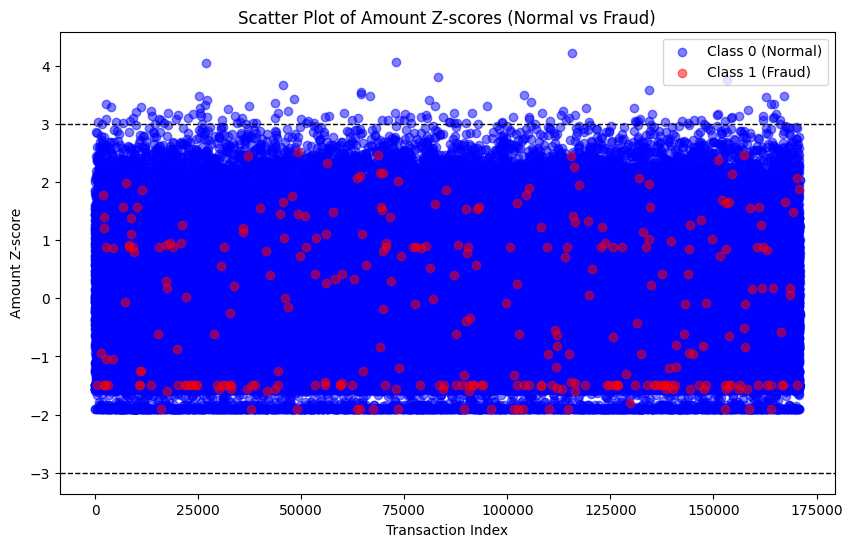

In [29]:
plt.figure(figsize=(10,6))

# Scatter plot
plt.scatter(df[df['Class']==0].index, df[df['Class']==0]['amount_z_scores'], 
            alpha=0.5, label="Class 0 (Normal)", color="blue")

plt.scatter(df[df['Class']==1].index, df[df['Class']==1]['amount_z_scores'], 
            alpha=0.5, label="Class 1 (Fraud)", color="red")

# خط يوضح الـ ±3 Z-score threshold
plt.axhline(3, color='black', linestyle='--', linewidth=1)
plt.axhline(-3, color='black', linestyle='--', linewidth=1)

plt.xlabel("Transaction Index")
plt.ylabel("Amount Z-score")
plt.title("Scatter Plot of Amount Z-scores (Normal vs Fraud)")
plt.legend()
plt.show()
df.drop(columns='amount_z_scores',inplace=True)

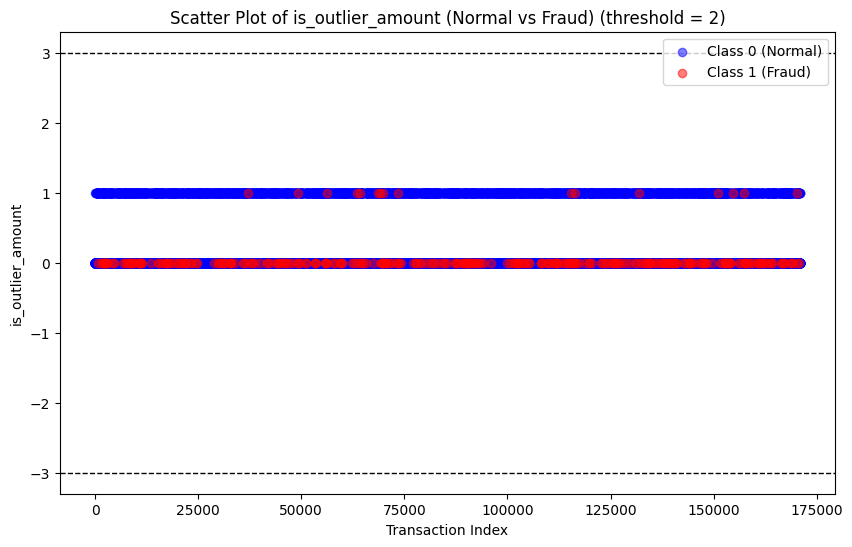

In [30]:
plt.figure(figsize=(10,6))

# Scatter plot
plt.scatter(df[df['Class']==0].index, df[df['Class']==0]['is_outlier_amount'], 
            alpha=0.5, label="Class 0 (Normal)", color="blue")

plt.scatter(df[df['Class']==1].index, df[df['Class']==1]['is_outlier_amount'], 
            alpha=0.5, label="Class 1 (Fraud)", color="red")

# خط يوضح الـ ±3 Z-score threshold
plt.axhline(3, color='black', linestyle='--', linewidth=1)
plt.axhline(-3, color='black', linestyle='--', linewidth=1)

plt.xlabel("Transaction Index")
plt.ylabel("is_outlier_amount")
plt.title("Scatter Plot of is_outlier_amount (Normal vs Fraud) (threshold = 2)")
plt.legend()
plt.show()


In [31]:
df['amount_bin'], bins = pd.qcut(
    df['log_amount'], 
    q=5,                  
    labels=["Very Low", "Low", "Medium", "High", "Very High"], 
    retbins=True
)

print(bins)  
print(df['amount_bin'].value_counts())


[ 0.          1.521699    2.6419104   3.64805746  4.61512052 10.15394117]
amount_bin
High         34297
Very Low     34225
Medium       34178
Low          34137
Very High    34047
Name: count, dtype: int64


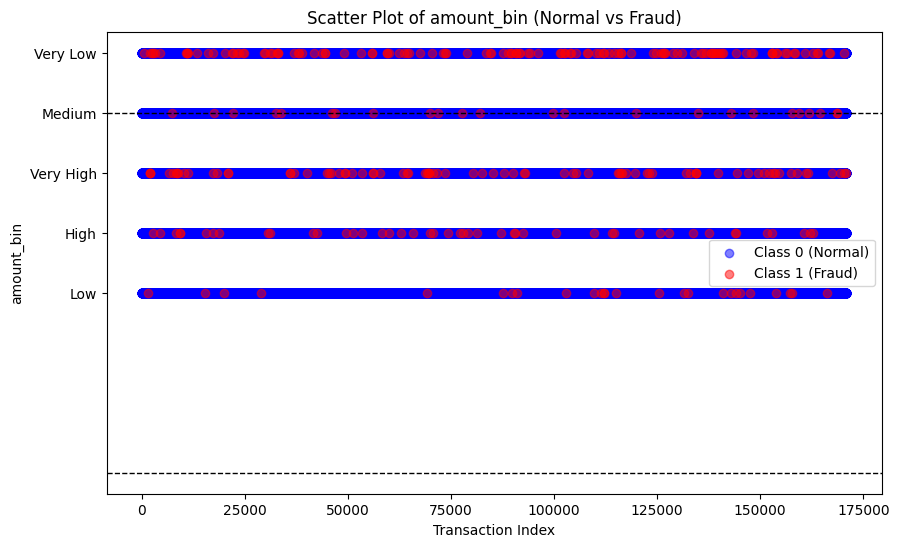

In [32]:
plt.figure(figsize=(10,6))

# Scatter plot
plt.scatter(df[df['Class']==0].index, df[df['Class']==0]['amount_bin'], 
            alpha=0.5, label="Class 0 (Normal)", color="blue")

plt.scatter(df[df['Class']==1].index, df[df['Class']==1]['amount_bin'], 
            alpha=0.5, label="Class 1 (Fraud)", color="red")

plt.axhline(3, color='black', linestyle='--', linewidth=1)
plt.axhline(-3, color='black', linestyle='--', linewidth=1)

plt.xlabel("Transaction Index")
plt.ylabel("amount_bin")
plt.title("Scatter Plot of amount_bin (Normal vs Fraud)")
plt.legend()
plt.show()


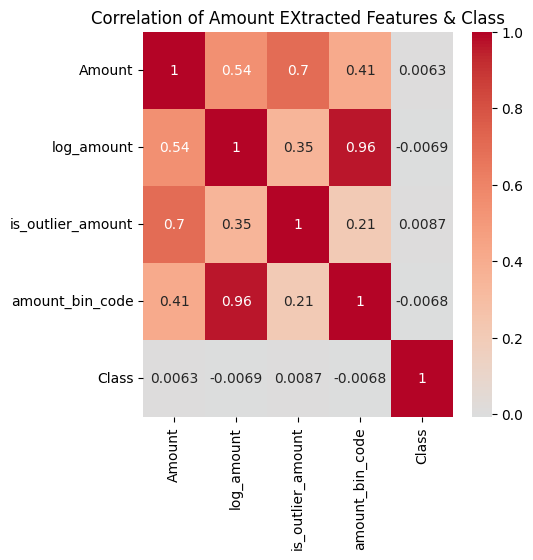

In [33]:
df['amount_bin_code'] = df['amount_bin'].cat.codes 
df_corr = df[['Amount','log_amount', 'is_outlier_amount', 'amount_bin_code', 'Class']].corr()

plt.figure(figsize=(5,5))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Amount EXtracted Features & Class")
plt.show()
df.drop(columns='amount_bin_code',inplace=True)

In [34]:
for feat in df[[f"V{i}" for i in range(1,29)]]:
    print(f'{feat}: {len(df[feat].unique())}')

V1: 166862
V2: 166862
V3: 166862
V4: 166862
V5: 166862
V6: 166862
V7: 166862
V8: 166862
V9: 166862
V10: 166862
V11: 166862
V12: 166862
V13: 166862
V14: 166862
V15: 166862
V16: 166862
V17: 166862
V18: 166862
V19: 166862
V20: 166862
V21: 166862
V22: 166862
V23: 166862
V24: 166862
V25: 166862
V26: 166862
V27: 166862
V28: 166862


In [35]:
df['amount_hour_interaction'] = df['log_amount'] * df['Hour']

df['V7_amount'] = df['V7'] * df['log_amount']

df['V12_amount'] = df['V12'] * df['log_amount']

df['V20_amount'] = df['V20'] * df['log_amount']

df['V11_hour'] = df['V11'] * df['Hour']

df['V12_hour'] = df['V12'] * df['Hour']


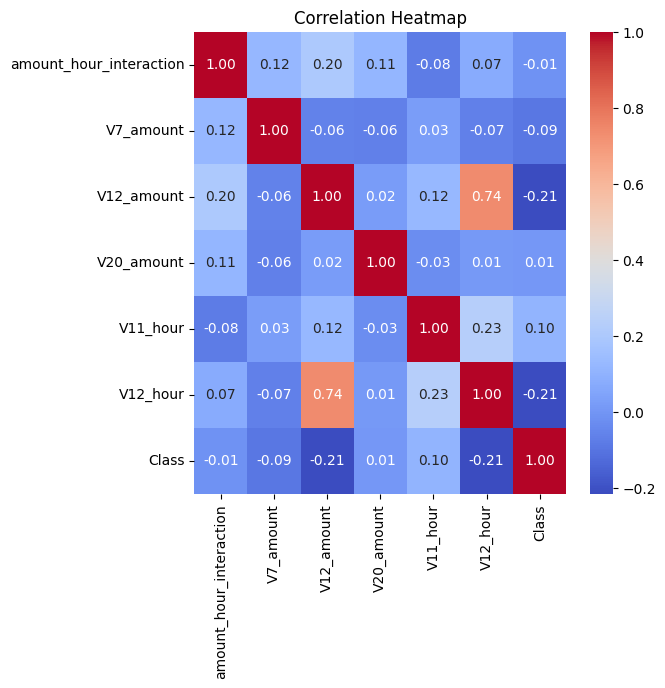

In [36]:
corr = df[['amount_hour_interaction','V7_amount','V12_amount','V20_amount','V11_hour','V12_hour','Class']].corr()
# Heatmap of correlation matrix
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [37]:
# For V-features (V1 to V28)
for i in range(1, 29):
    col = f"V{i}"
    z_col = f"{col}_zscore"
    outlier_col = f"{col}_is_outlier"
    
    df[z_col] = (df[col] - df[col].mean()) / df[col].std()
    df[outlier_col] = (df[z_col].abs() > 2).astype(int)

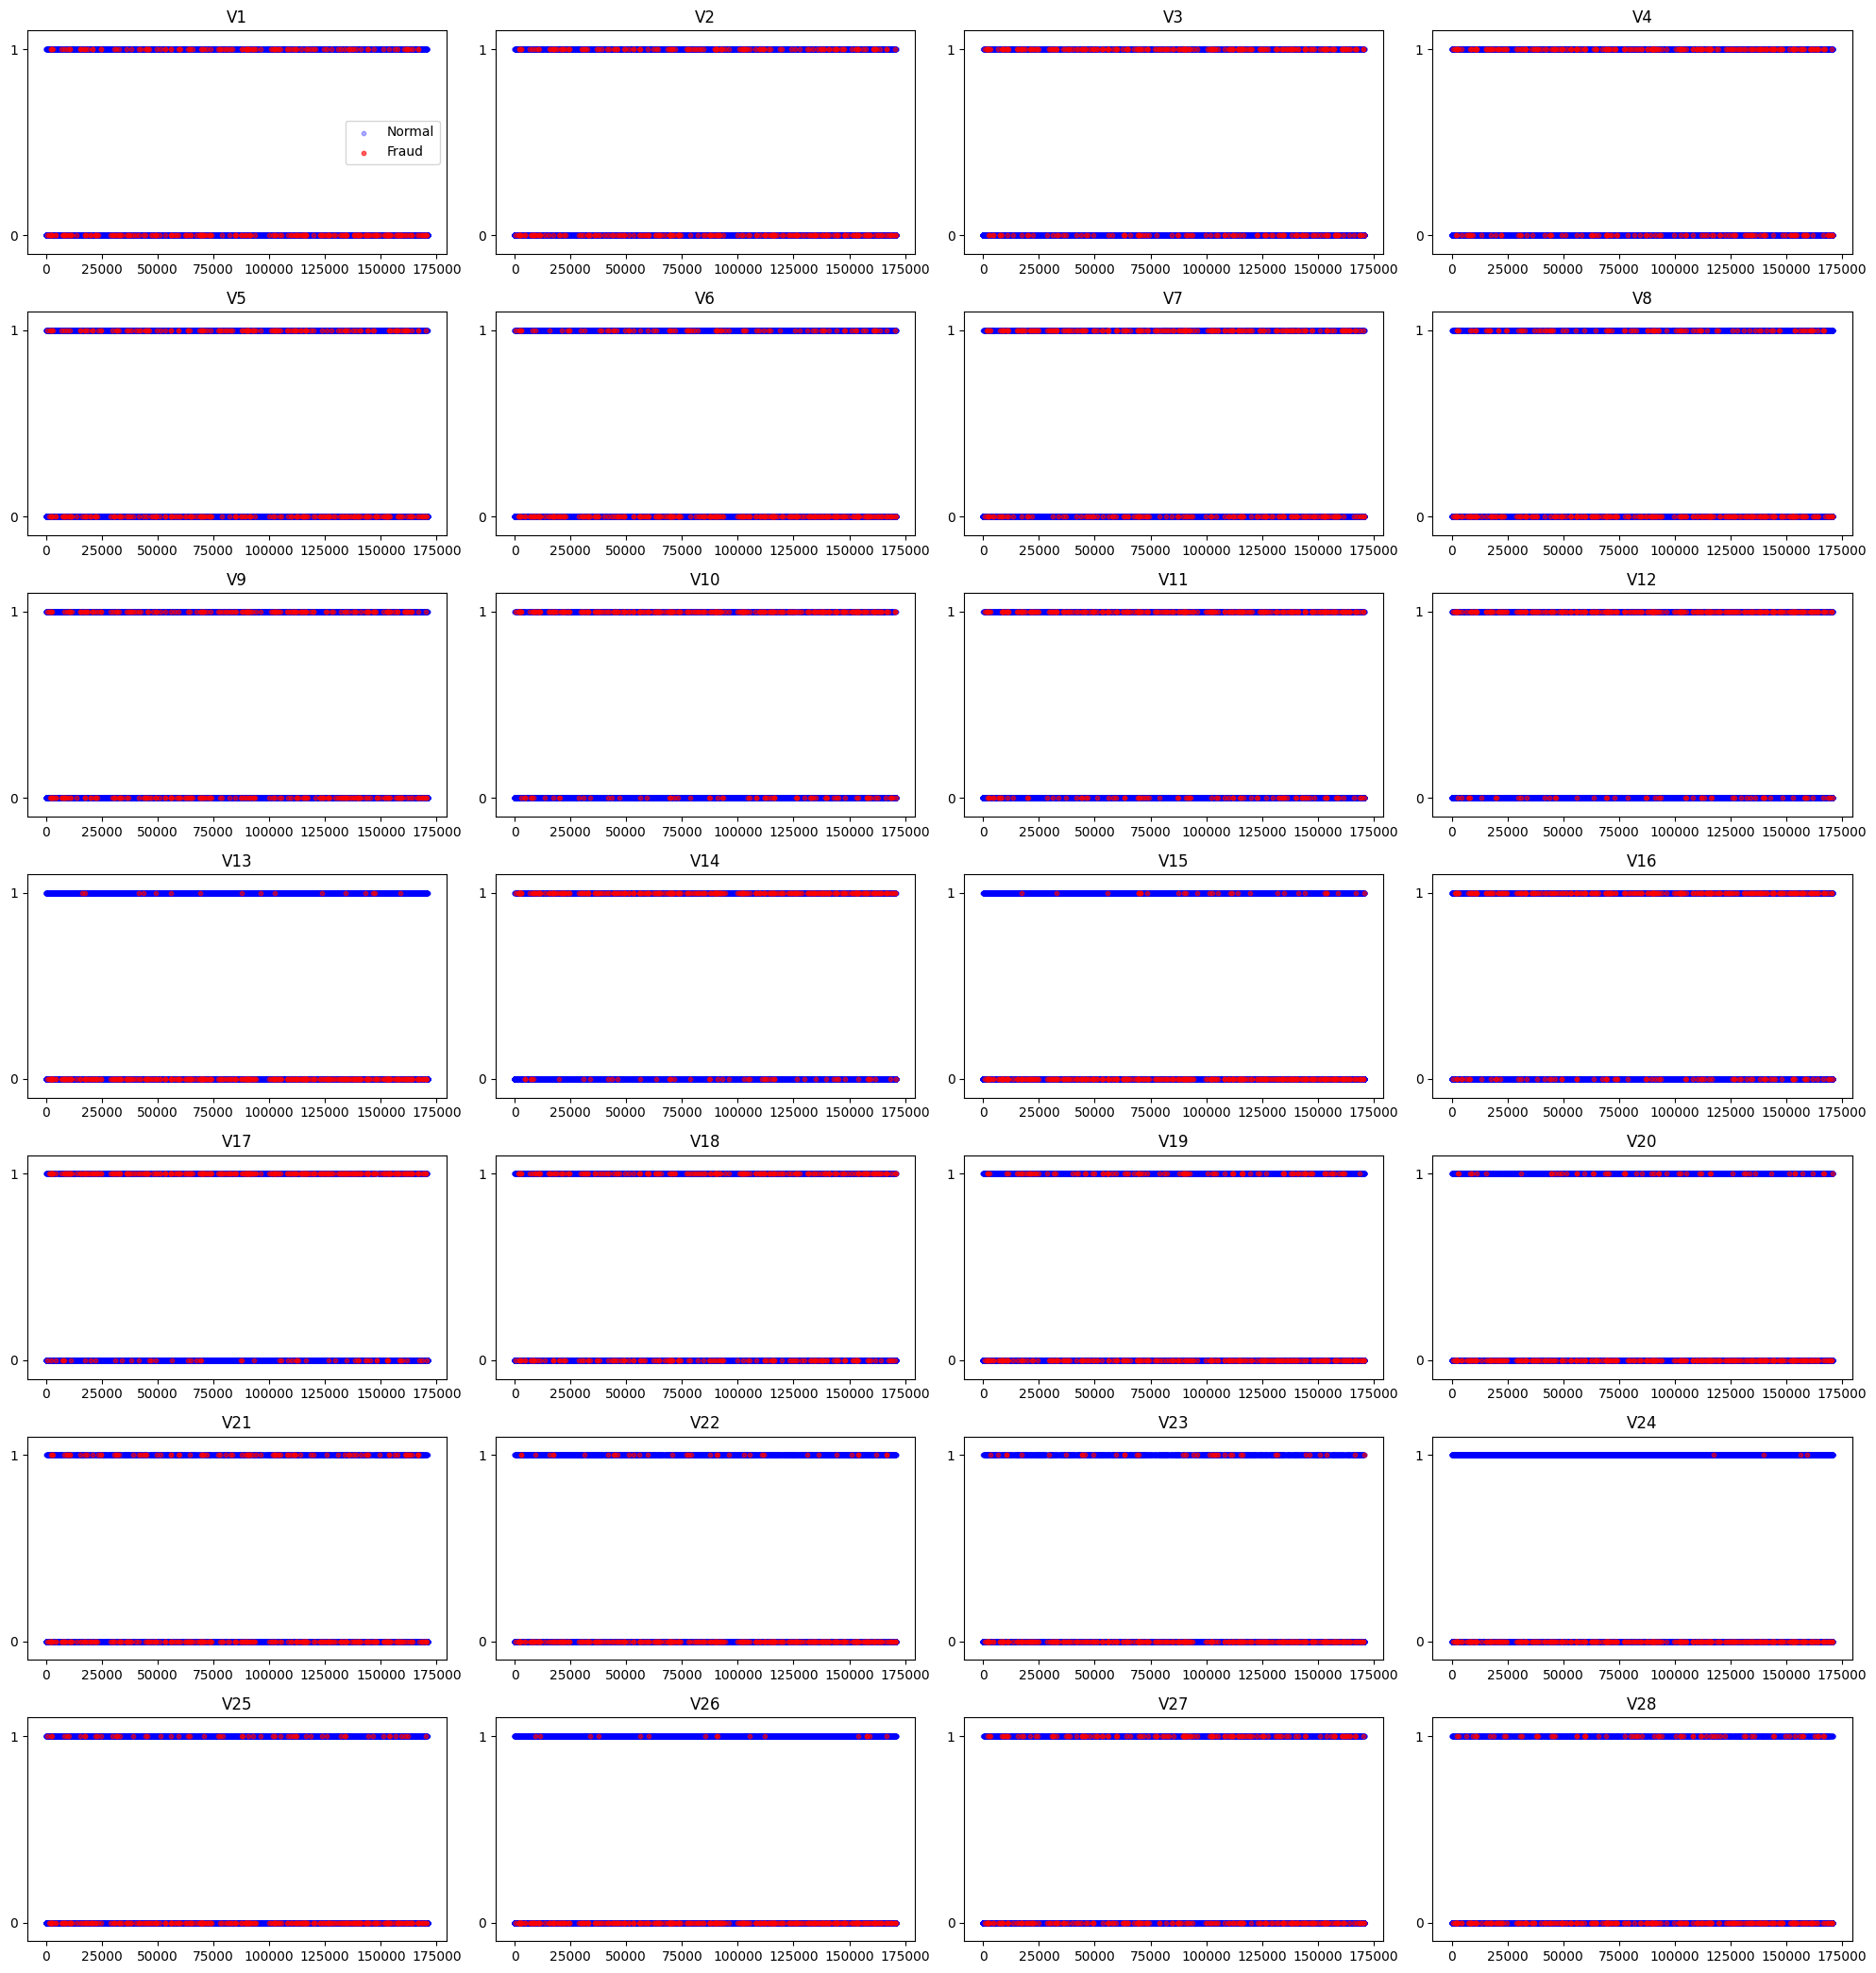

In [38]:
cols = [f"V{i}_is_outlier" for i in range(1, 29)]
n_cols = 4
n_rows = int(np.ceil(len(cols) / n_cols))

plt.figure(figsize=(20, n_rows * 3))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    plt.scatter(df[df['Class']==0].index, df[df['Class']==0][col], 
                alpha=0.3, label="Normal", color="blue", s=10)
    plt.scatter(df[df['Class']==1].index, df[df['Class']==1][col], 
                alpha=0.6, label="Fraud", color="red", s=10)
    
    plt.title(col.replace("_is_outlier",""))
    plt.ylim(-0.1, 1.1)
    plt.yticks([0,1])
    
    if i == 1:  # legend once
        plt.legend()

plt.tight_layout()
plt.show()

In [39]:
cols = [f"V{i}_is_outlier" for i in range(1, 29) if i not in [13, 15, 22, 23, 24, 26]]
cols

['V1_is_outlier',
 'V2_is_outlier',
 'V3_is_outlier',
 'V4_is_outlier',
 'V5_is_outlier',
 'V6_is_outlier',
 'V7_is_outlier',
 'V8_is_outlier',
 'V9_is_outlier',
 'V10_is_outlier',
 'V11_is_outlier',
 'V12_is_outlier',
 'V14_is_outlier',
 'V16_is_outlier',
 'V17_is_outlier',
 'V18_is_outlier',
 'V19_is_outlier',
 'V20_is_outlier',
 'V21_is_outlier',
 'V25_is_outlier',
 'V27_is_outlier',
 'V28_is_outlier']

In [40]:
df.drop(columns=cols,inplace=True)

In [41]:
cols = [f"V{i}_zscore" for i in range(1, 29) ]
df.drop(columns=cols,inplace=True)

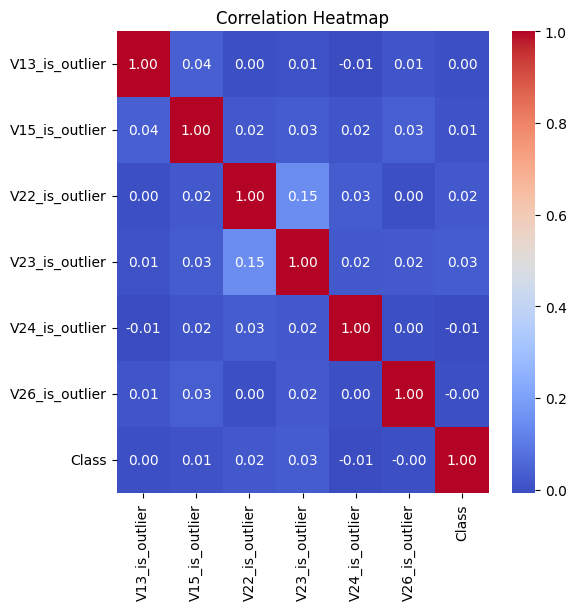

                V13_is_outlier  V15_is_outlier  V22_is_outlier  \
V13_is_outlier        1.000000        0.035503        0.001632   
V15_is_outlier        0.035503        1.000000        0.021885   
V22_is_outlier        0.001632        0.021885        1.000000   
V23_is_outlier        0.005892        0.030444        0.148039   
V24_is_outlier       -0.008195        0.015340        0.030682   
V26_is_outlier        0.012229        0.033717        0.002692   
Class                 0.001301        0.009935        0.021225   

                V23_is_outlier  V24_is_outlier  V26_is_outlier     Class  
V13_is_outlier        0.005892       -0.008195        0.012229  0.001301  
V15_is_outlier        0.030444        0.015340        0.033717  0.009935  
V22_is_outlier        0.148039        0.030682        0.002692  0.021225  
V23_is_outlier        1.000000        0.021252        0.023367  0.028395  
V24_is_outlier        0.021252        1.000000        0.001406 -0.006744  
V26_is_outlier       

In [42]:
corr = df[['V13_is_outlier','V15_is_outlier','V22_is_outlier','V23_is_outlier','V24_is_outlier','V26_is_outlier','Class']].corr()
# Heatmap of correlation matrix
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
print(corr)

In [43]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Features & Target
X = df.drop(['Time', 'Amount', 'Class'], axis=1)  # Includes amount_bin
y = df['Class']

# One-hot encode amount_bin
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity
amount_bin_encoded = encoder.fit_transform(df[['amount_bin']])
amount_bin_df = pd.DataFrame(amount_bin_encoded, columns=[f'amount_bin_{cat}' for cat in encoder.categories_[0][1:]])

# Drop the original amount_bin and concatenate encoded columns
X = pd.concat([X.drop('amount_bin', axis=1), amount_bin_df], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# XGBoost model
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    scale_pos_weight=(len(y[y==0]) / len(y[y==1])),  # Handle imbalance
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


<Figure size 6000x6000 with 0 Axes>

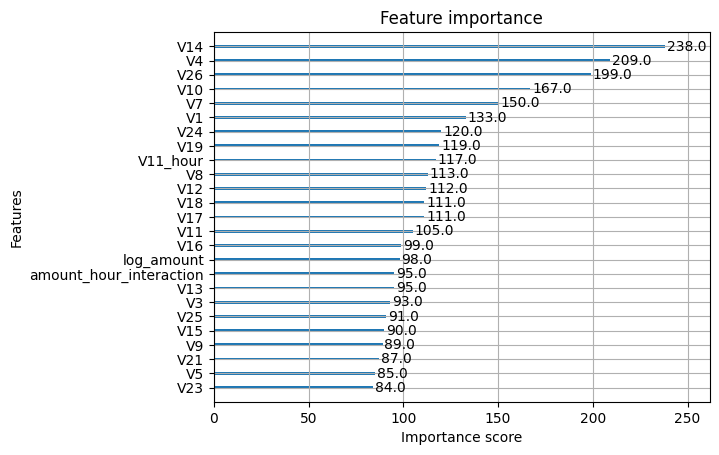

In [44]:
# Plot importance
plt.figure(figsize=(60,60))
plot_importance(xgb, max_num_features=25, importance_type="weight")
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 48 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Time                     170884 non-null  float64 
 1   V1                       170884 non-null  float64 
 2   V2                       170884 non-null  float64 
 3   V3                       170884 non-null  float64 
 4   V4                       170884 non-null  float64 
 5   V5                       170884 non-null  float64 
 6   V6                       170884 non-null  float64 
 7   V7                       170884 non-null  float64 
 8   V8                       170884 non-null  float64 
 9   V9                       170884 non-null  float64 
 10  V10                      170884 non-null  float64 
 11  V11                      170884 non-null  float64 
 12  V12                      170884 non-null  float64 
 13  V13                      170884 non-null  fl

In [46]:
from sklearn.preprocessing import OrdinalEncoder

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded = df.copy()
oe = OrdinalEncoder()
df_encoded['amount_bin'] = oe.fit_transform(df_encoded[['amount_bin']])

In [47]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 48 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Time                     170884 non-null  float64
 1   V1                       170884 non-null  float64
 2   V2                       170884 non-null  float64
 3   V3                       170884 non-null  float64
 4   V4                       170884 non-null  float64
 5   V5                       170884 non-null  float64
 6   V6                       170884 non-null  float64
 7   V7                       170884 non-null  float64
 8   V8                       170884 non-null  float64
 9   V9                       170884 non-null  float64
 10  V10                      170884 non-null  float64
 11  V11                      170884 non-null  float64
 12  V12                      170884 non-null  float64
 13  V13                      170884 non-null  float64
 14  V14 

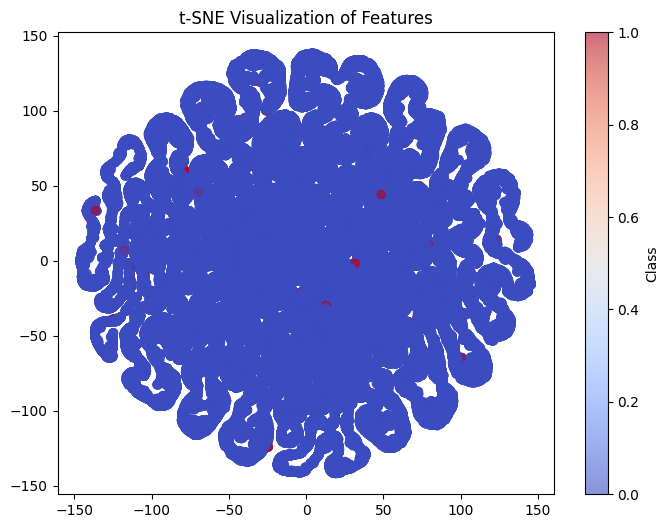

In [48]:
from sklearn.manifold import TSNE

X = df_encoded.drop(columns=['Class'])
y = df_encoded['Class']

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, cmap='coolwarm', alpha=0.6)
plt.colorbar(label="Class")
plt.title("t-SNE Visualization of Features")
plt.show()